In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import seaborn as sns


driver = webdriver.PhantomJS('phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
driver.get("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml")

# waiting for the page to load - TODO: change
wait = WebDriverWait(driver, 10)

try:
    wait.until(EC.visibility_of_element_located((By.ID, "content")))
except Exception:
    driver.save_screenshot('screenshot.png')





data = driver.page_source
driver.close()

soup = BeautifulSoup(data, "html.parser")

/home/ankit/anaconda3/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [2]:
tbl = soup.find('table')
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

driver = webdriver.PhantomJS('phantomjs-2.1.1-linux-x86_64/bin/phantomjs')
driver.get("https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml")

# waiting for the page to load - TODO: change
wait = WebDriverWait(driver, 10)

try:
    wait.until(EC.visibility_of_element_located((By.ID, "content")))
except Exception:
    driver.save_screenshot('screenshot.png')





data = driver.page_source
driver.close()

soup = BeautifulSoup(data, "html.parser")
rows = tbl.findAll('tr')

/home/ankit/anaconda3/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [3]:
data_full = []
for row in rows:
    #print (row,'\n')
    data_row = []
    cols = row.find_all('td')
    for col in cols:
        #print (col,'\n')
        try:
            data_row.append(col.contents[0])
        except:
            data_row.append(np.nan)
    data_full.append(data_row)

In [4]:
df = pd.DataFrame(data_full)
df = df.loc[~(df.isnull().sum(axis=1)>=24)]

col = [i for i in df.columns if pd.notnull(i)]
df = df[col]

In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
col = [i for i in df.columns if pd.notnull(i)]
df = df[col]

In [6]:
df['Date Announced'].unique()

array(['30/01/2020', '02/02/2020', '03/02/2020', '02/03/2020',
       '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020',
       '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020',
       '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020',
       '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020',
       '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '04/04/2020', '05/04/2020'], dtype=object)

In [7]:
pd.to_datetime(df['Date Announced'],format='%d/%m/%Y').min(), pd.to_datetime(df['Date Announced'],format='%d/%m/%Y').max()

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-04-05 00:00:00'))

In [8]:
df['Date Announced'] = pd.to_datetime(df['Date Announced'],format='%d/%m/%Y')

In [9]:
from datetime import datetime  
from datetime import timedelta   
unique_state = df['Detected State'].unique()
min_date = df['Date Announced'].min()
max_date = df['Date Announced'].max()

In [10]:
min_date,max_date

(Timestamp('2020-01-30 00:00:00'), Timestamp('2020-04-05 00:00:00'))

In [11]:
total_date = []
total_date.append(min_date)
while True:
    min_date = min_date + timedelta(days=1) 
    total_date.append(min_date)
    if min_date >= max_date:
        break

In [12]:
state = []
date = []
for s in unique_state:
    for d in total_date:
        state.append(s)
        date.append(d)

In [13]:
df1 = pd.DataFrame({'state':state,'date':date})
#df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.dayofyear
df['day'] = df['Date Announced'].dt.dayofyear

In [14]:
df1.columns

Index(['state', 'date', 'day'], dtype='object')

In [15]:
df_state_day_count = df.groupby(['Detected State','day'])['Patient Number'].agg('count').reset_index()
df_state_day_count.columns = ['state', 'day', 'patient_count']

In [16]:
unique_state = df_state_day_count.groupby('state')['patient_count'].sum().reset_index().sort_values('patient_count',ascending=False)['state'].unique()

In [17]:
df1 = df1.merge(df_state_day_count,on=['state','day'],how='left')

In [18]:
df1.replace(np.nan,0,inplace=True)

In [19]:

def weekly_trend(**kwargs):
    """
    Mean transaction amount on a weekly basis for a given feature
    """
    feature = kwargs.get('feature', None)
    f = df2.groupby([*feature, pd.Grouper(key='date',freq='D')])['patient_count'].sum().reset_index()
    f['date'] = f['date'].dt.date
    f.columns = [*feature,'date','sum']
    hue = feature[0]
    val = None if len(feature) == 1 else feature[1] 
    aspect = 1 if val is not None else 2
    height = 10 if val is not None else 7
    g = sns.catplot(x="date", 
            y = 'sum',
            hue = hue,
            col = val,
            data=f, 
            kind='point', 
            height = height,
            aspect = aspect,
            palette=sns.color_palette("bright", 10)
            )
    g.set_xticklabels(rotation=90)

/home/ankit/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


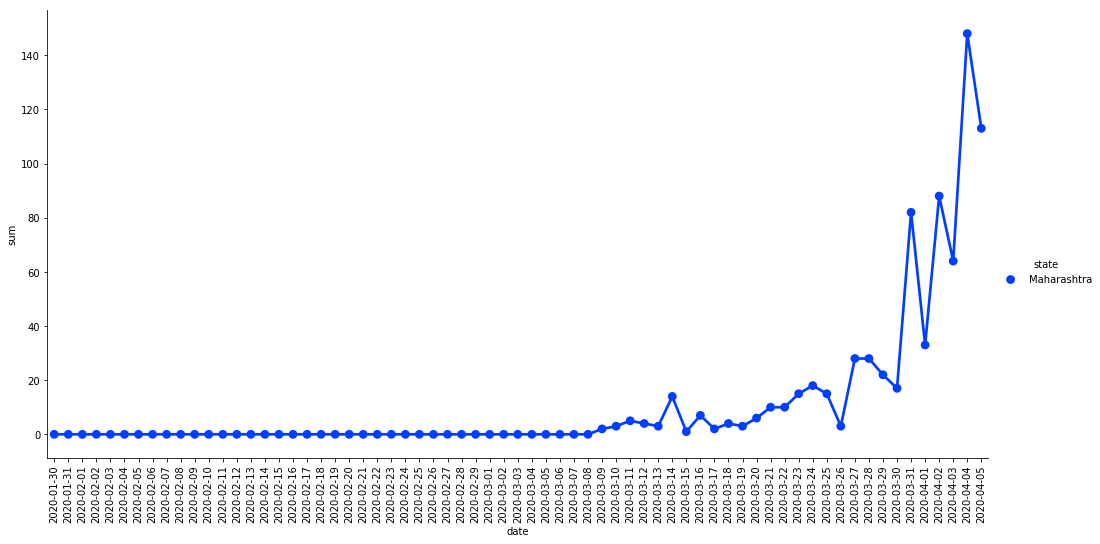

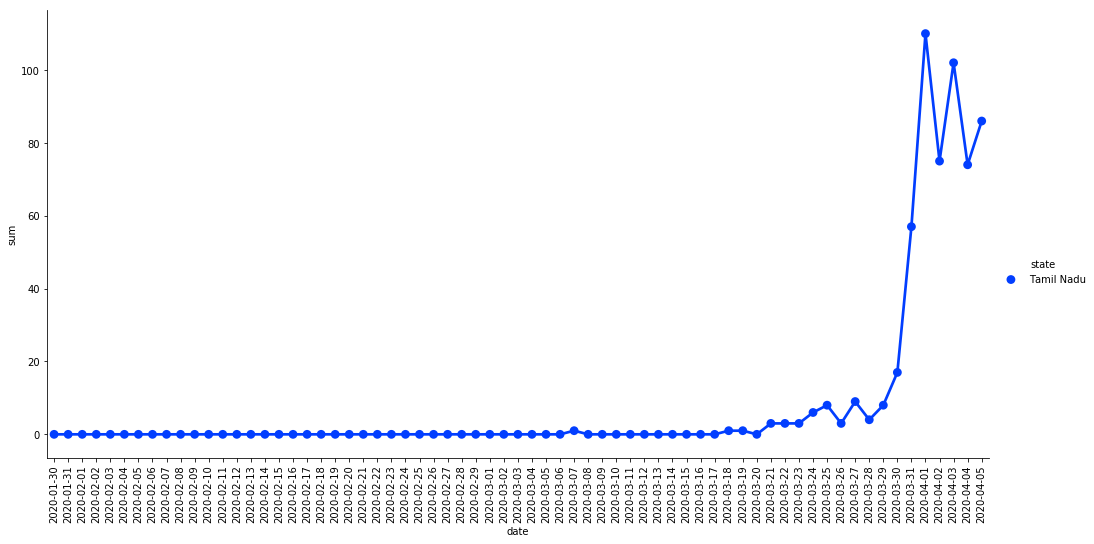

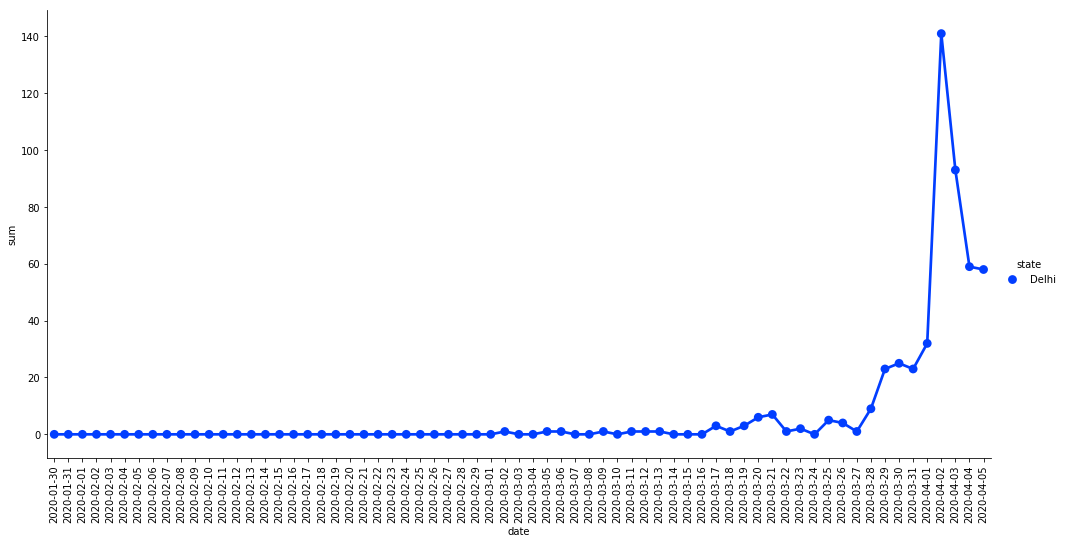

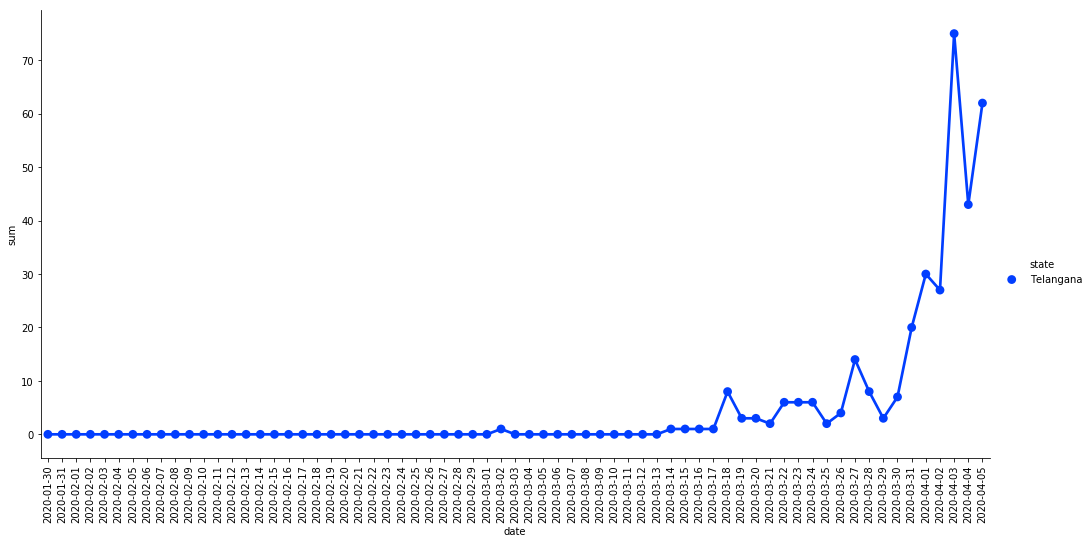

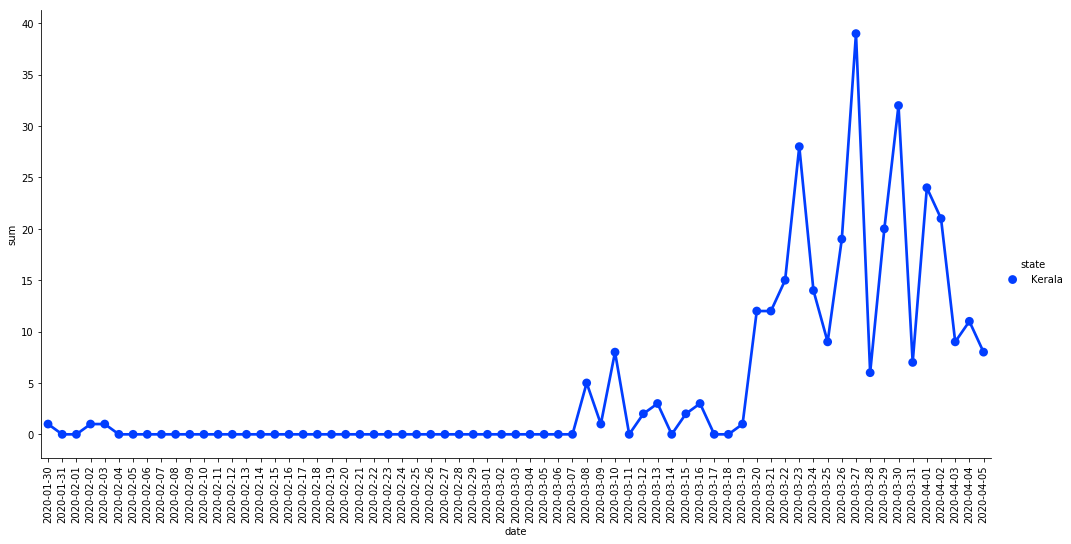

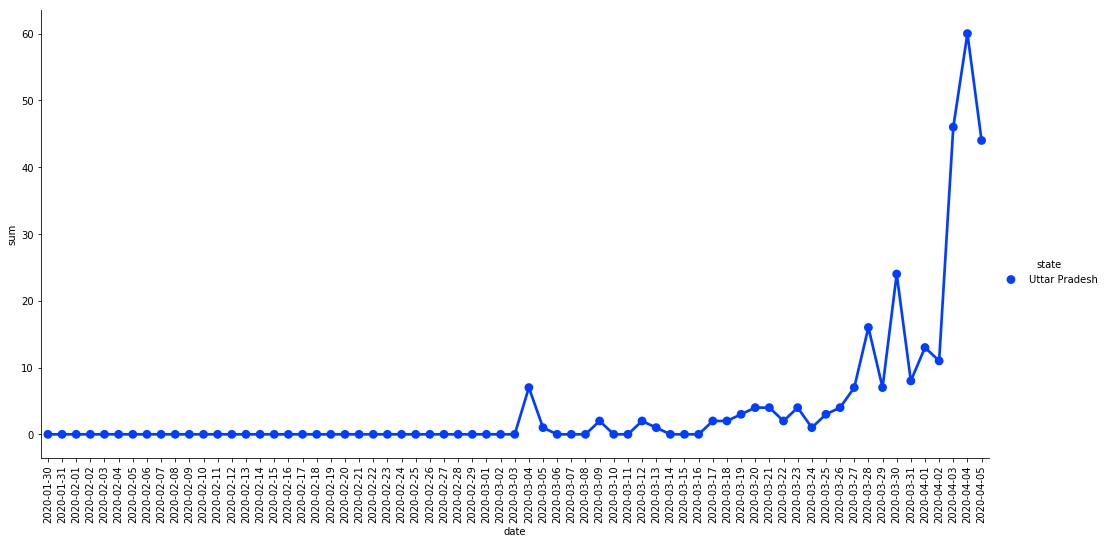

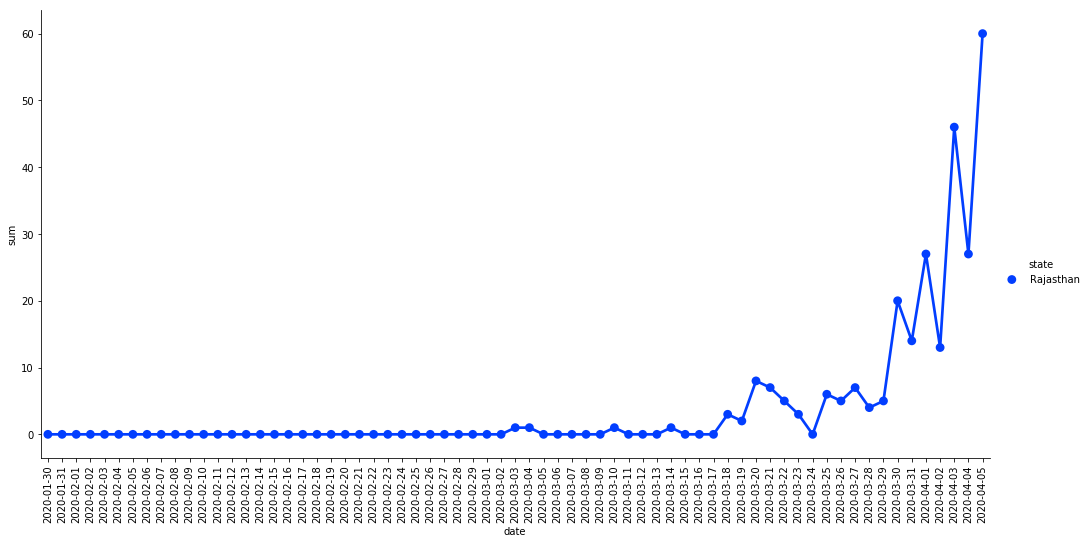

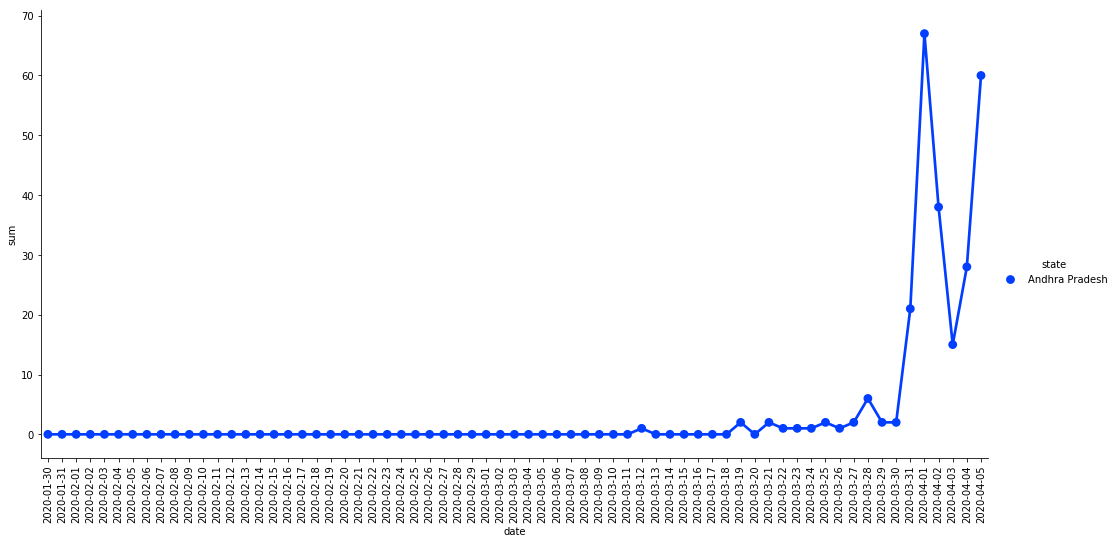

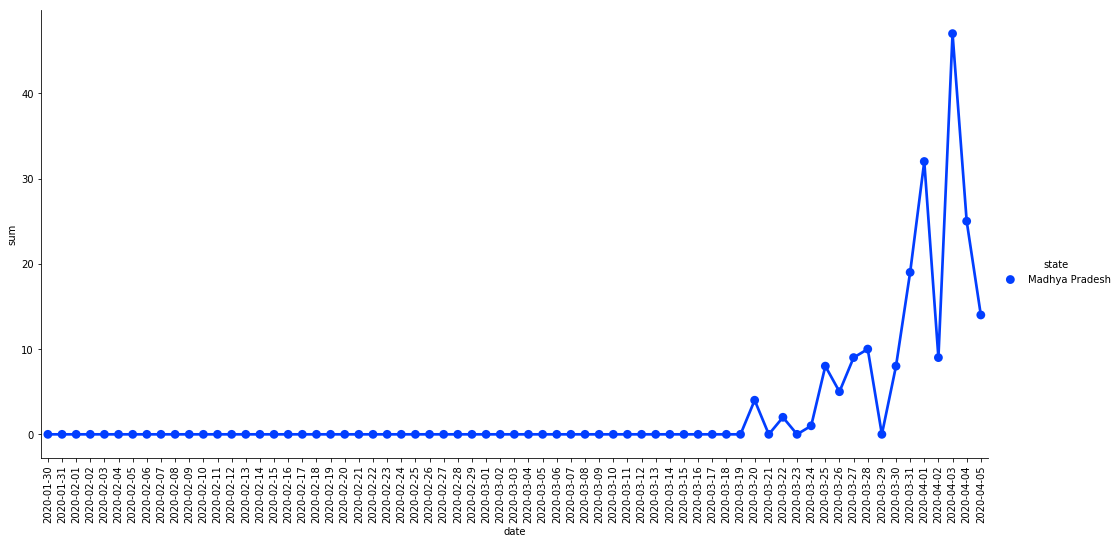

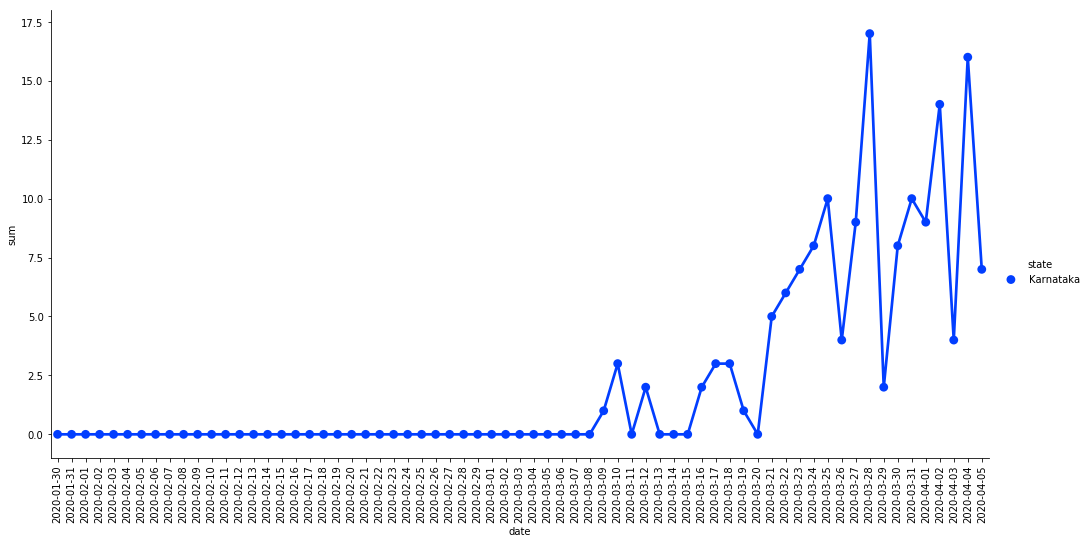

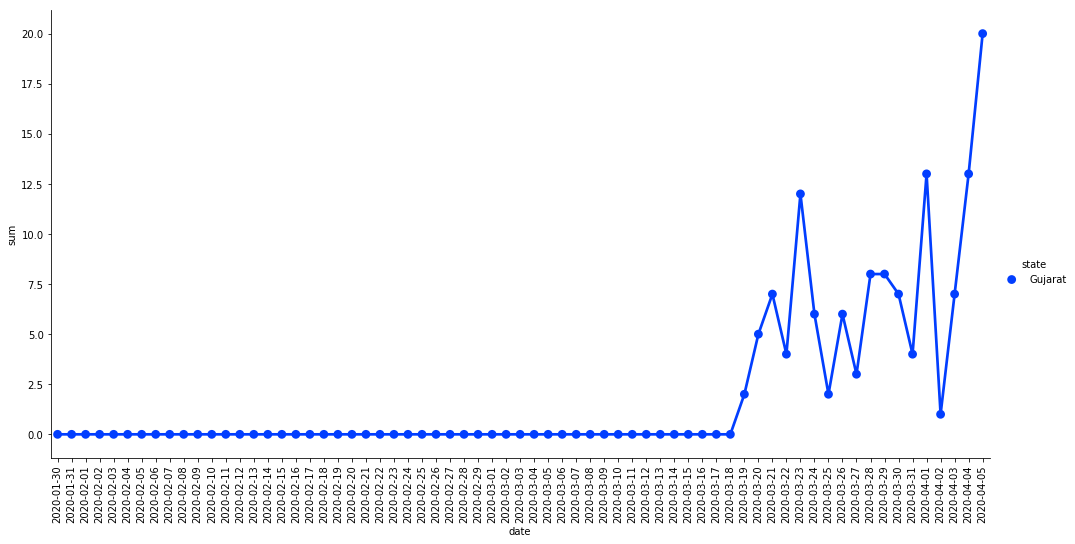

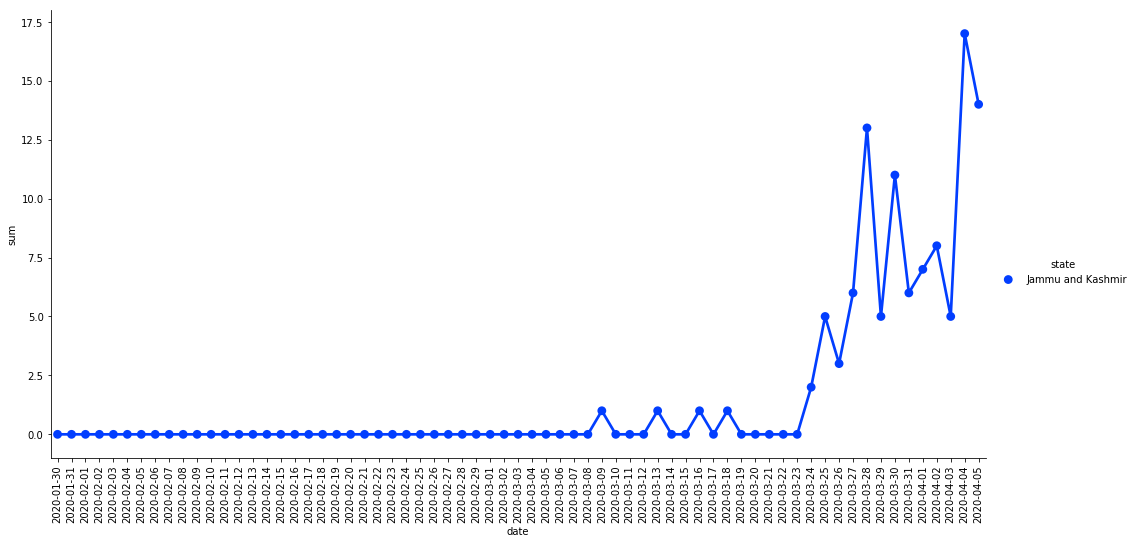

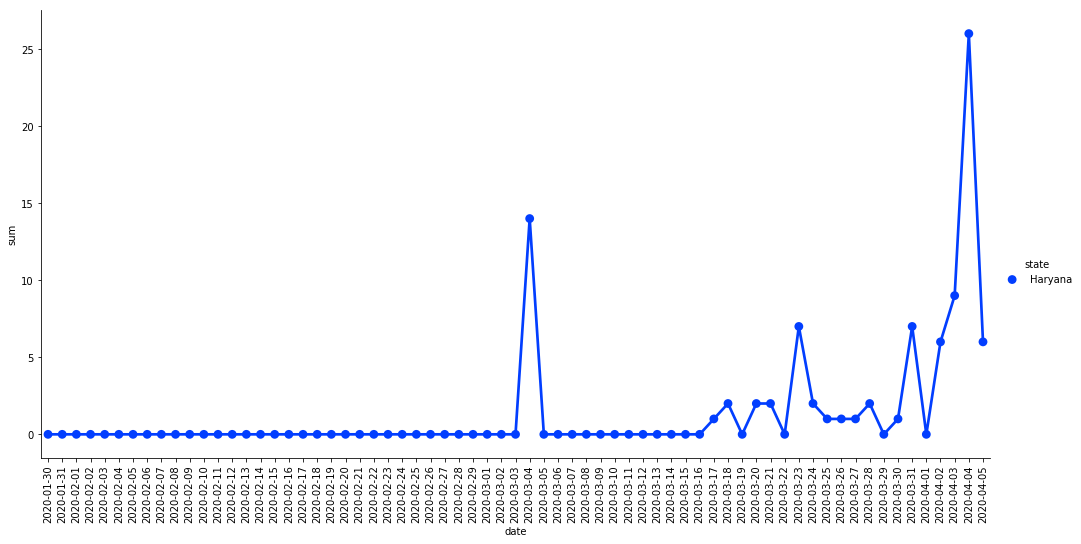

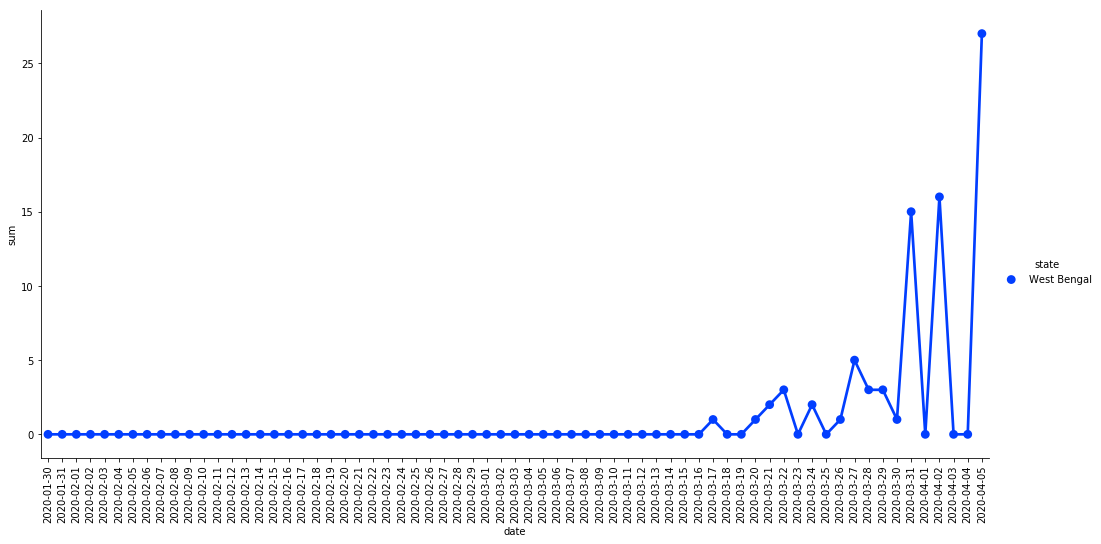

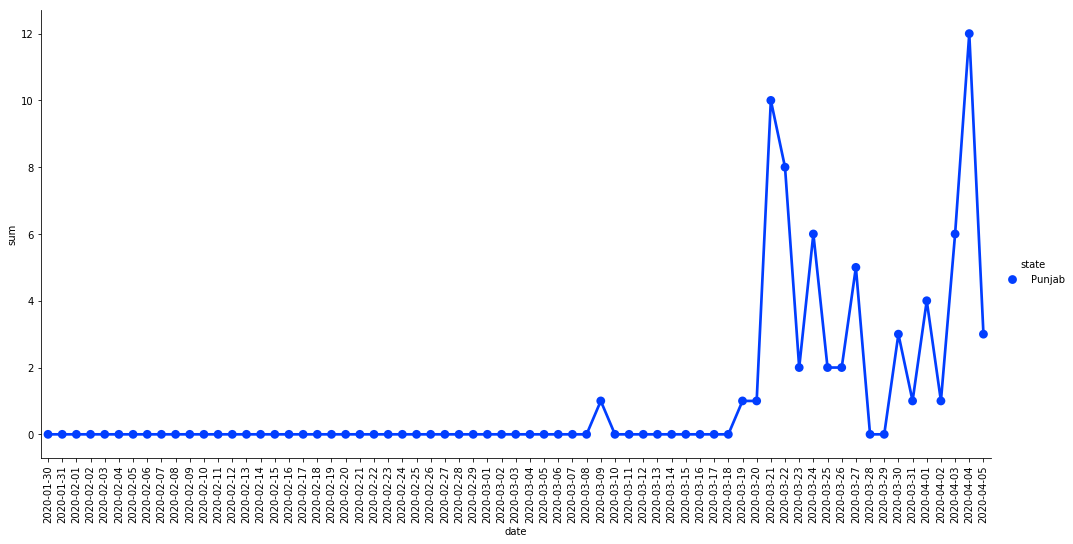

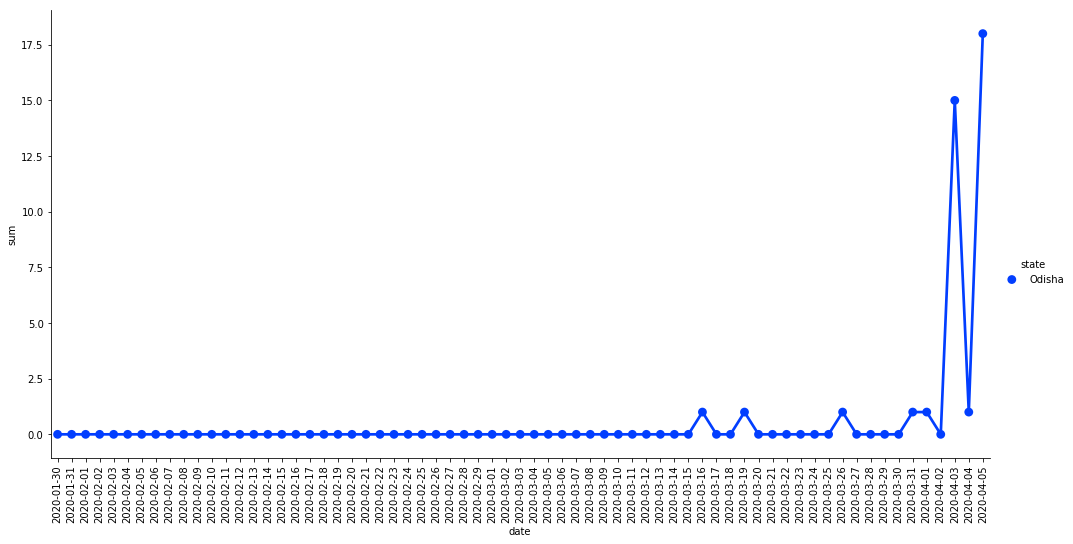

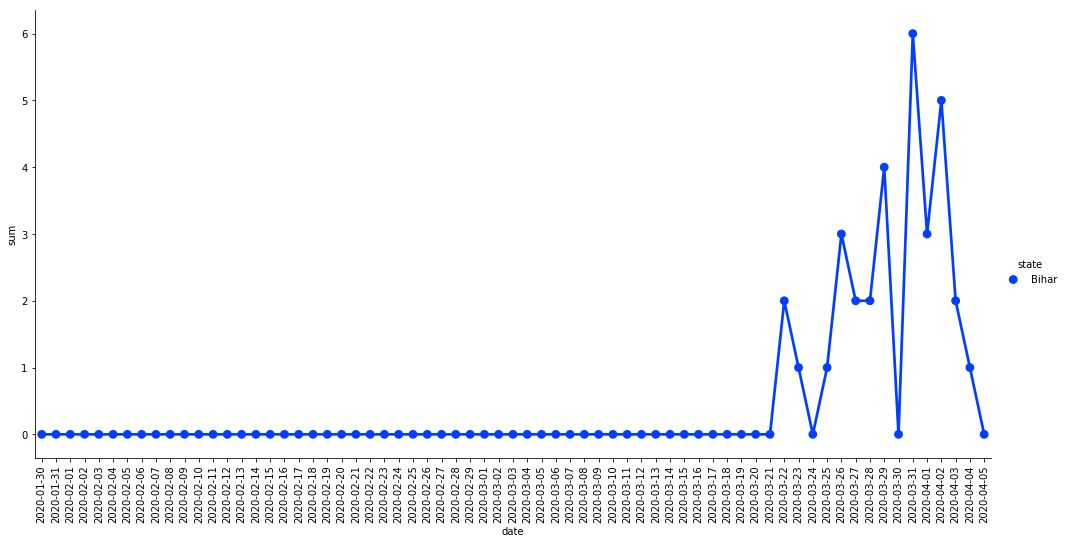

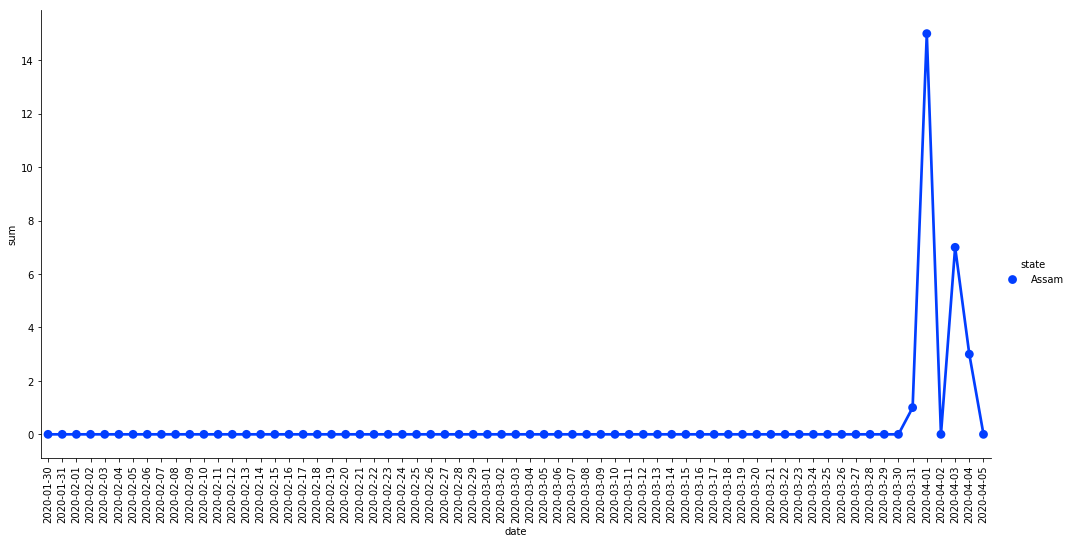

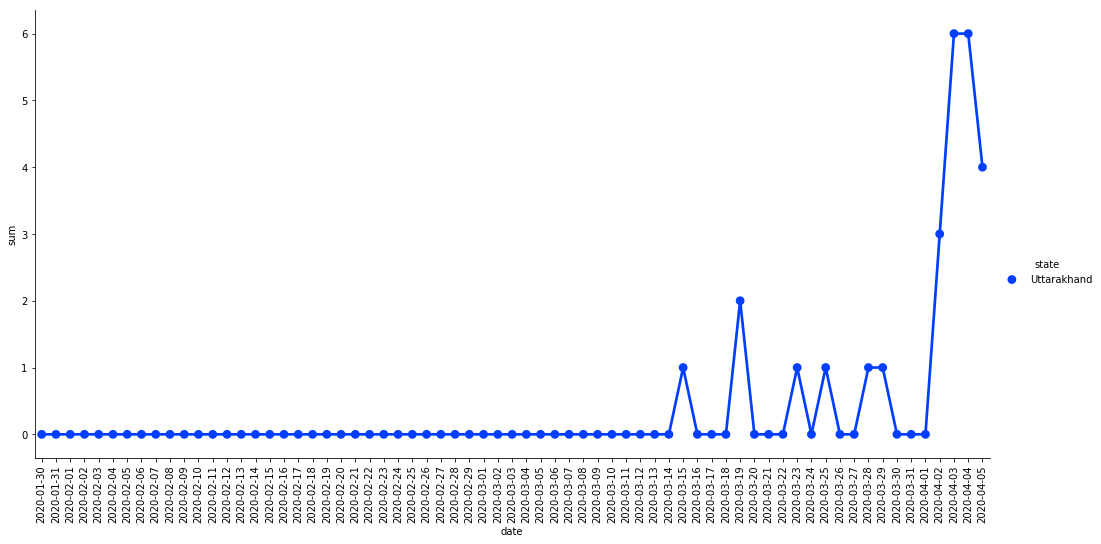

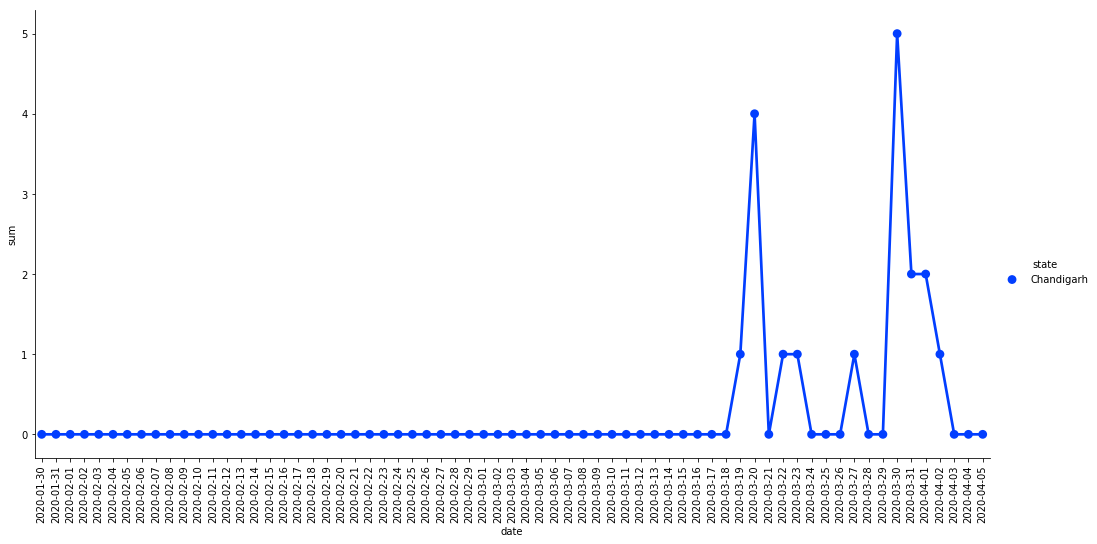

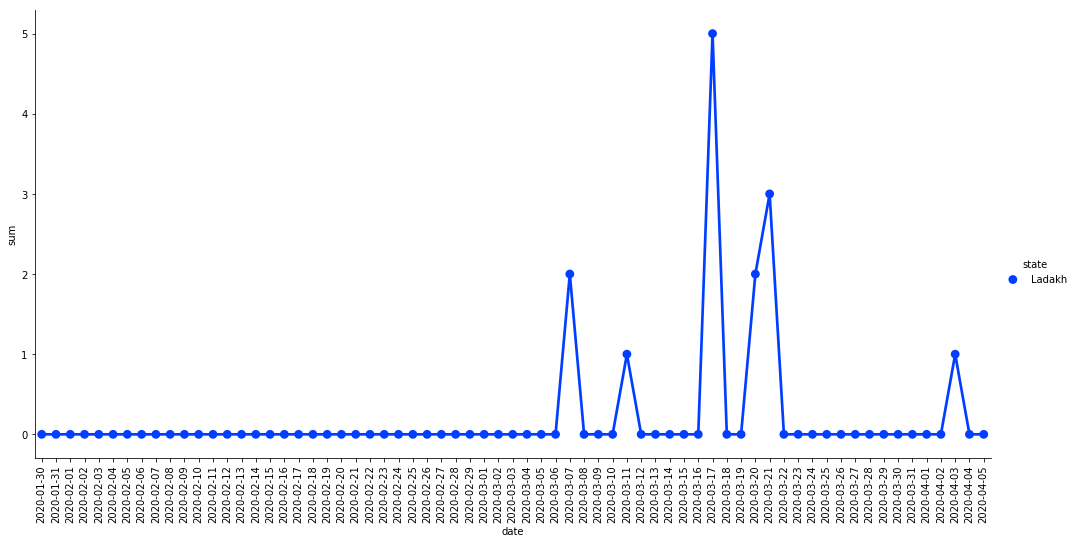

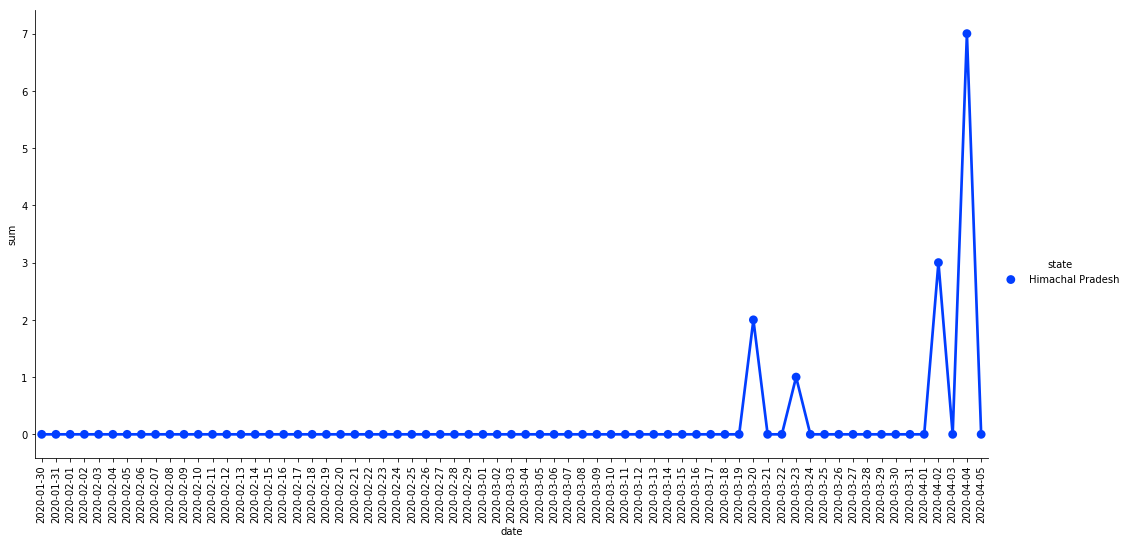

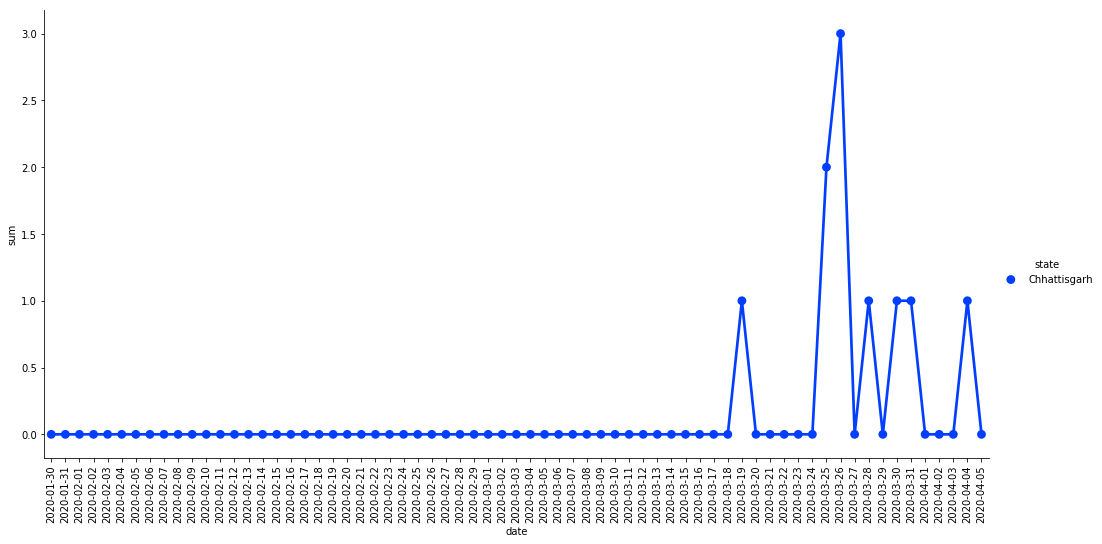

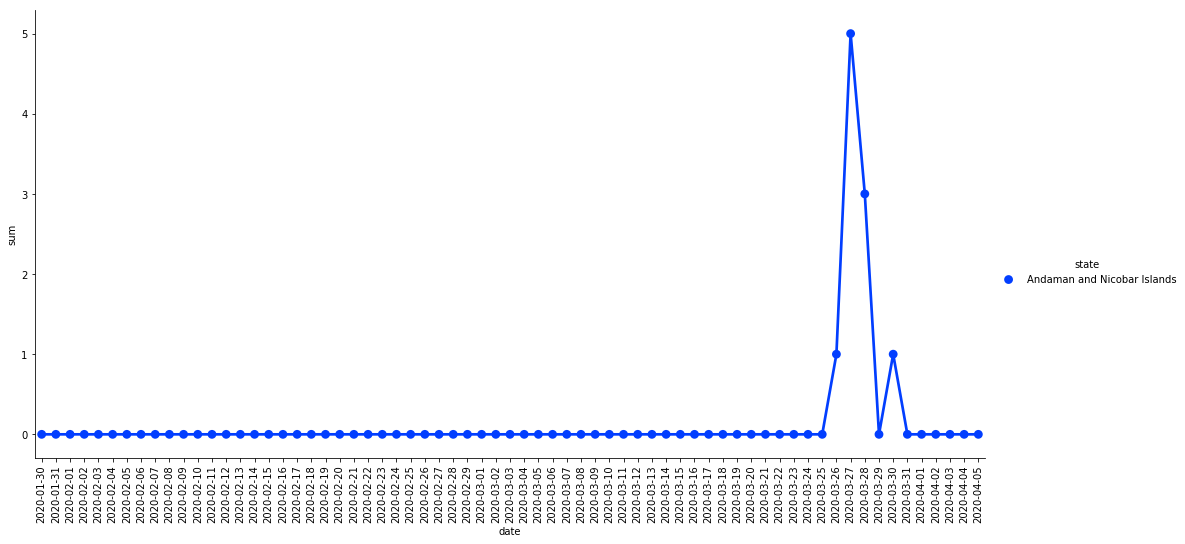

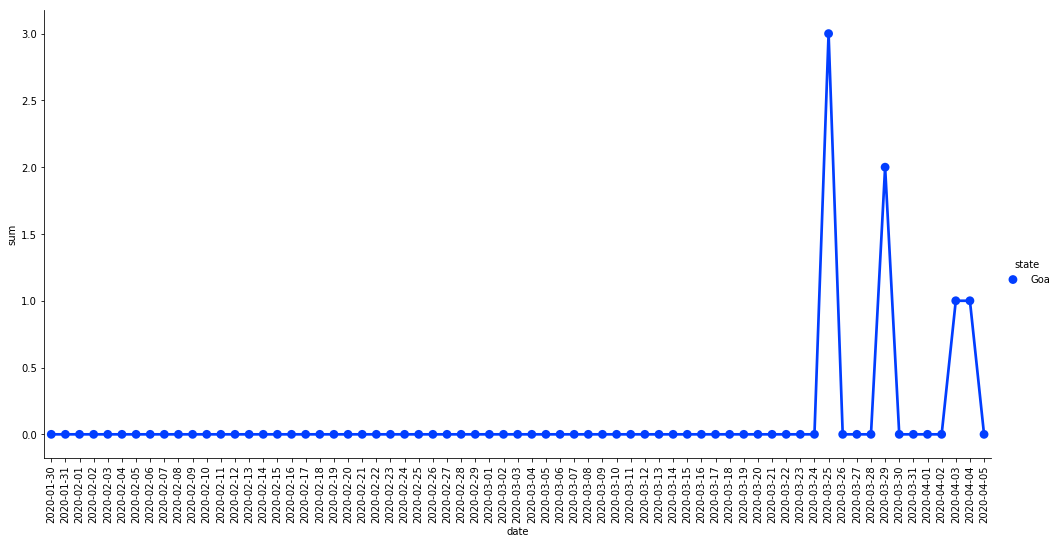

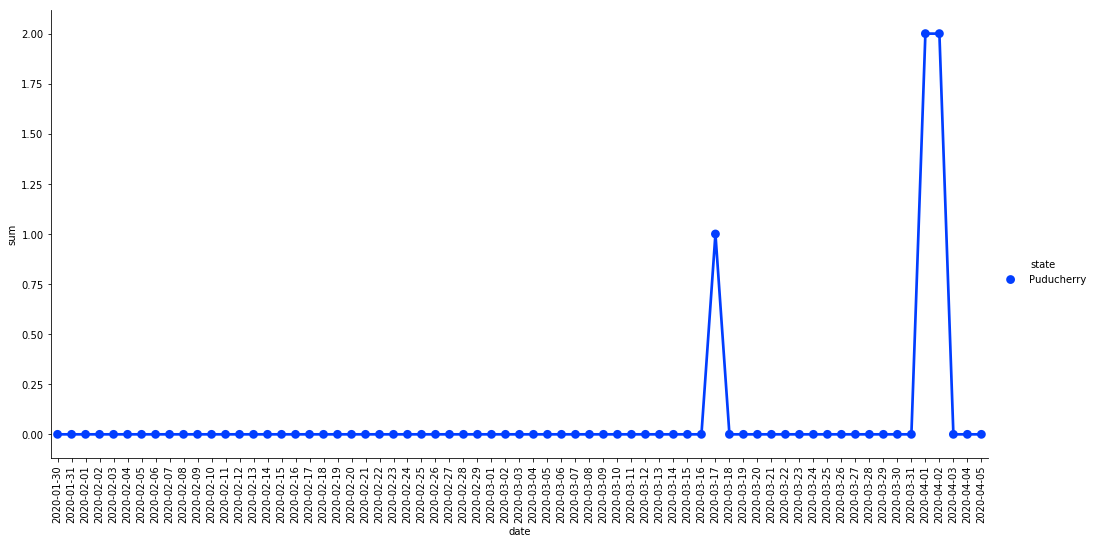

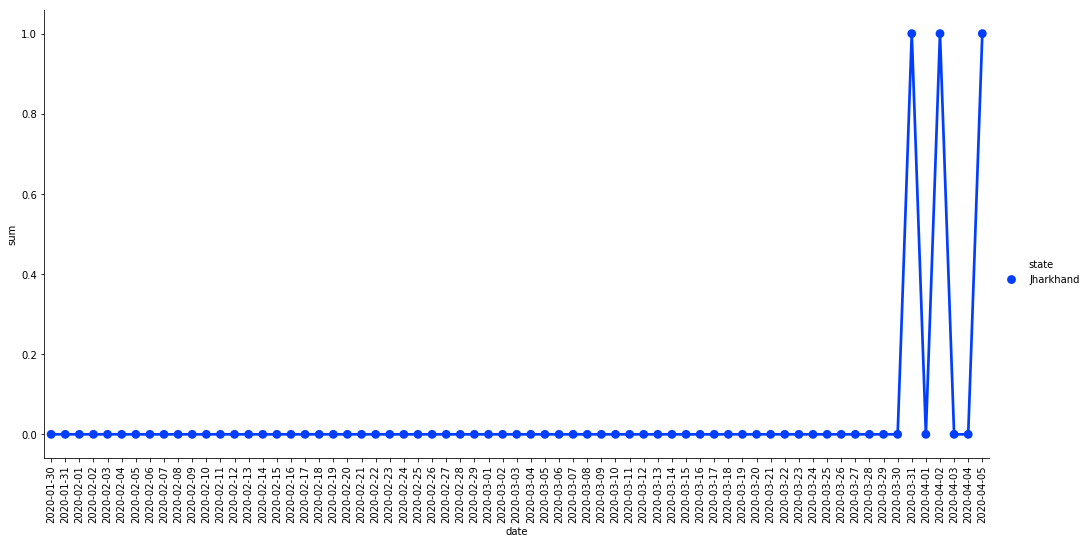

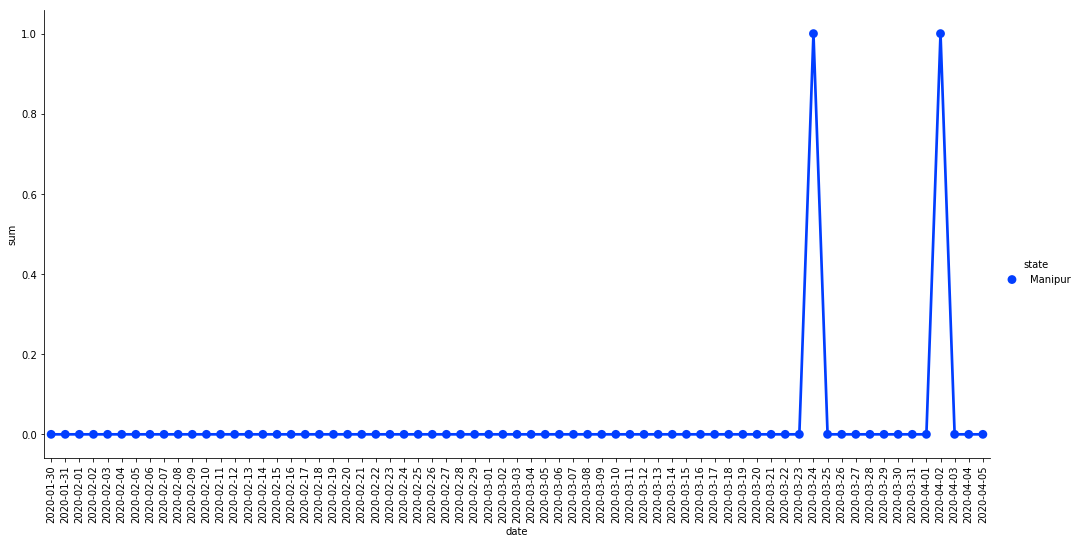

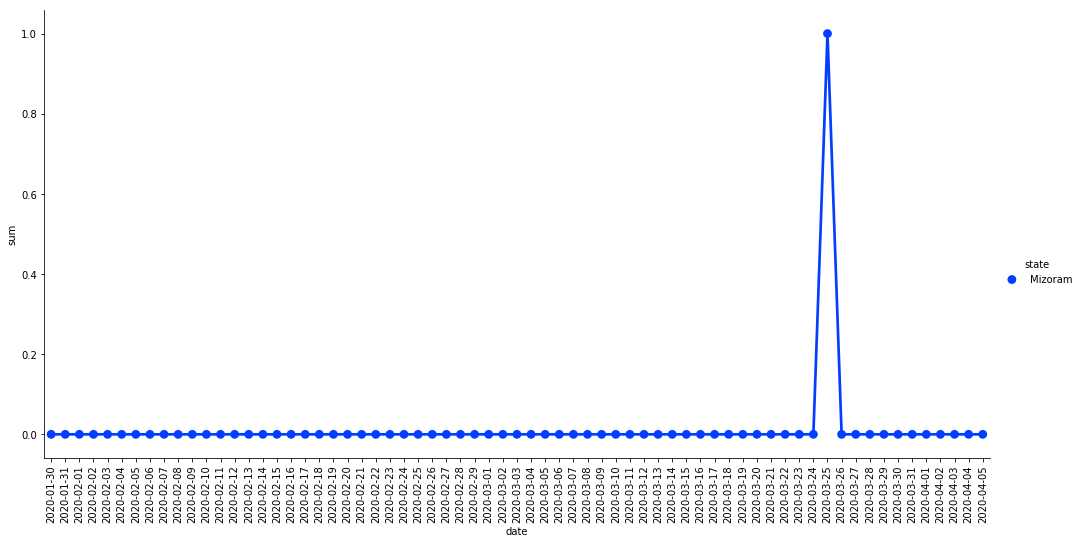

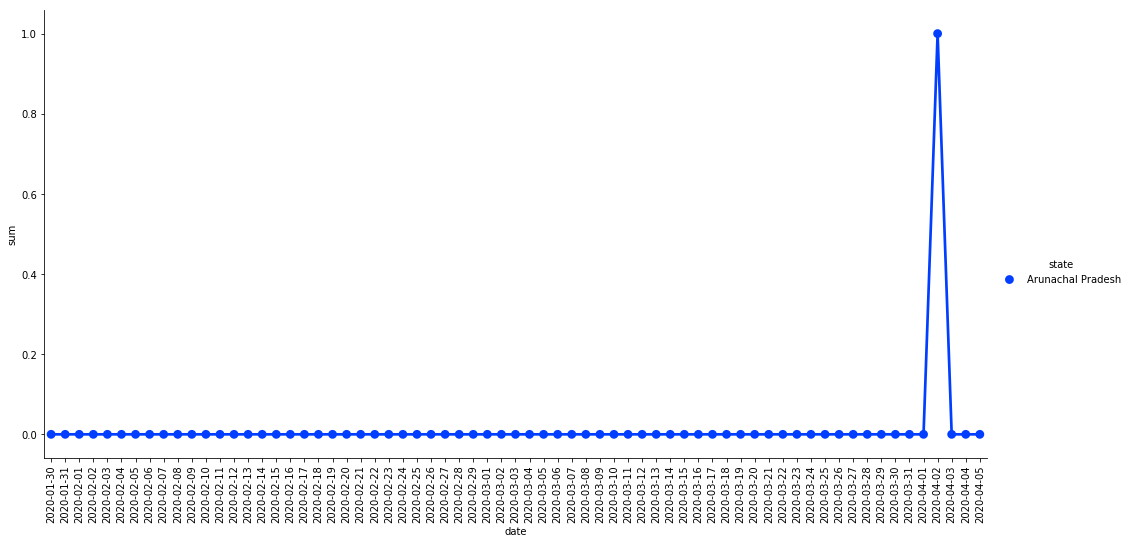

In [20]:
for s in unique_state:
    df2 = df1.loc[df1.state==s]
    #print (s)
    weekly_trend(feature=['state'])

In [21]:
df_state_day_count = df.groupby(['Detected State','day'])['Patient Number'].agg('count').reset_index()
df_state_day_count.columns = ['state', 'day', 'patient_count']

In [22]:
df.columns

Index([Patient Number, State Patient Number, Date Announced, Age Bracket,
       Gender, Detected City, Detected District, Detected State, State code,
       Current Status, Notes, Contracted from which Patient (Suspected),
       Nationality, Type of transmission, Status Change Date, Source_1,
       Source_2, Source_3, Backup Notes, 'day'],
      dtype='object', name=1)

In [23]:
df['Detected District'].replace(np.nan,'UNKNOWN', inplace=True )

In [24]:
unique_city = df['Detected District'].unique()

In [25]:
state_list_comb  = df.groupby('Detected State')['Detected District'].apply(lambda x: np.unique(x)).to_dict()

In [26]:
state_list_comb['Andaman and Nicobar Islands']

array(['North and Middle Andaman', 'South Andaman', 'UNKNOWN'],
      dtype=object)

In [27]:
state = []
city = []
date = []

for s in unique_state:
    for c in state_list_comb[s]:
        for d in total_date:
            state.append(s)
            city.append(c)
            date.append(d)

In [28]:
df1 = pd.DataFrame({'state':state,'city':city,'date':date})
#df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.dayofyear
df['day'] = df['Date Announced'].dt.dayofyear

In [29]:
df_state__city_day_count = df.groupby(['Detected State','Detected District','day'])['Patient Number'].agg('count').reset_index()
df_state__city_day_count.columns = ['state','city', 'day', 'patient_count']

In [30]:
df1 = df1.merge(df_state__city_day_count,on=['state','city','day'],how='left')


In [31]:
df1.replace(np.nan,0,inplace=True)
df1.patient_count.sum()

4289.0

In [32]:

def weekly_trend(**kwargs):
    """
    Mean transaction amount on a weekly basis for a given feature
    """
    feature = kwargs.get('feature', None)
    f = df2.groupby([*feature, pd.Grouper(key='date',freq='D')])['patient_count'].sum().reset_index()
    f['date'] = f['date'].dt.date
    f.columns = [*feature,'date','sum']
    hue = feature[0]
    val = None if len(feature) == 1 else feature[1] 
    aspect = 1 if val is not None else 2
    height = 10 if val is not None else 7
    g = sns.catplot(x="date", 
            y = 'sum',
            hue = hue,
            col = val,
            data=f, 
            kind='point', 
            height = height,
            aspect = aspect,
            palette=sns.color_palette("bright", 10)
            )
    g.set_xticklabels(rotation=90)

In [33]:
df1['city'] = df1['city'] + '_' + df1['state']

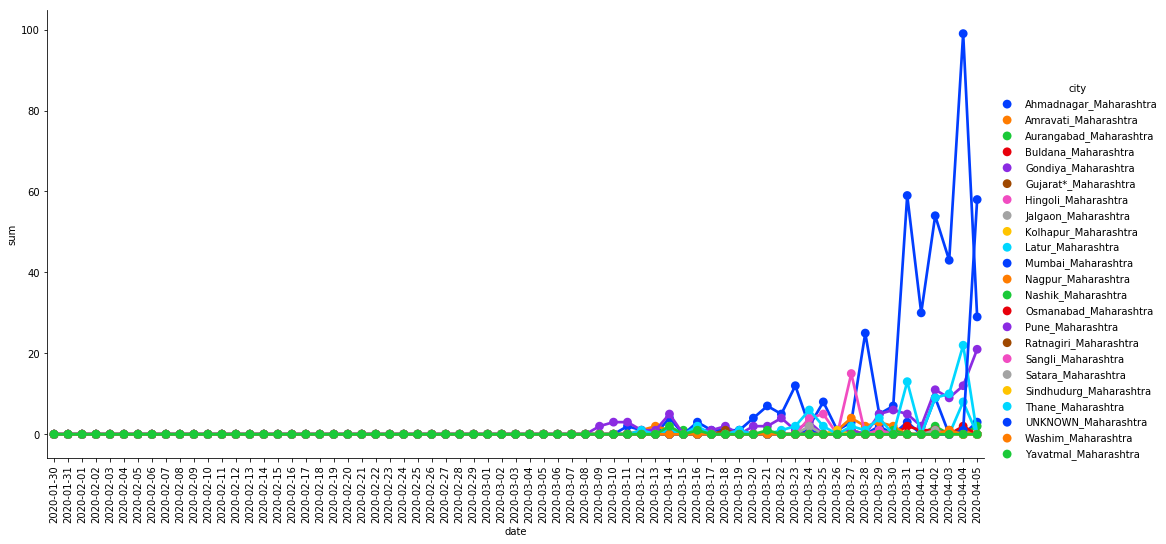

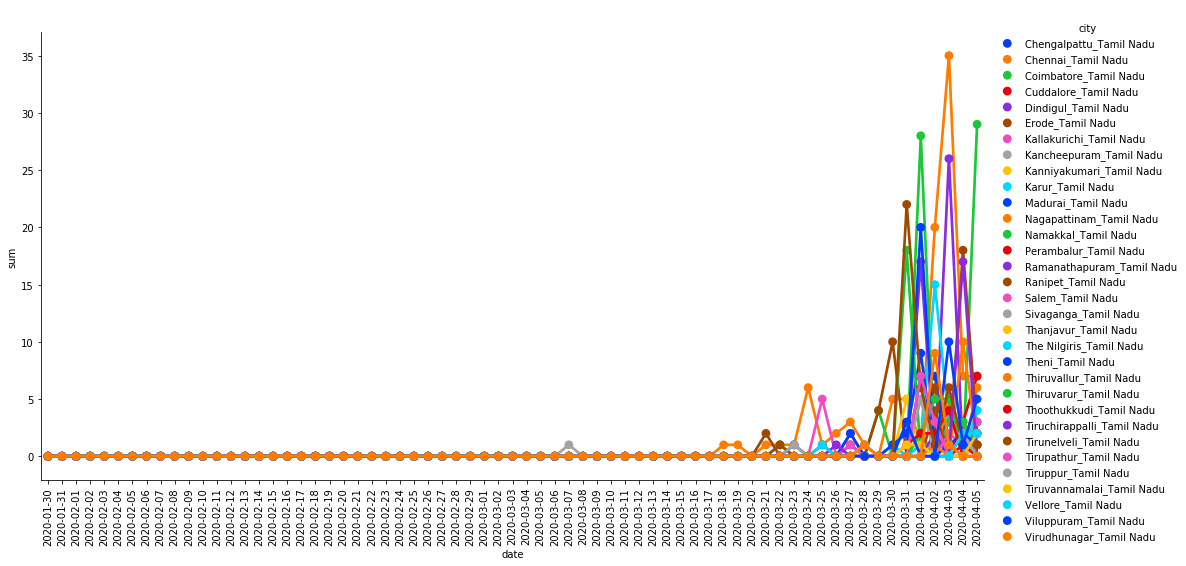

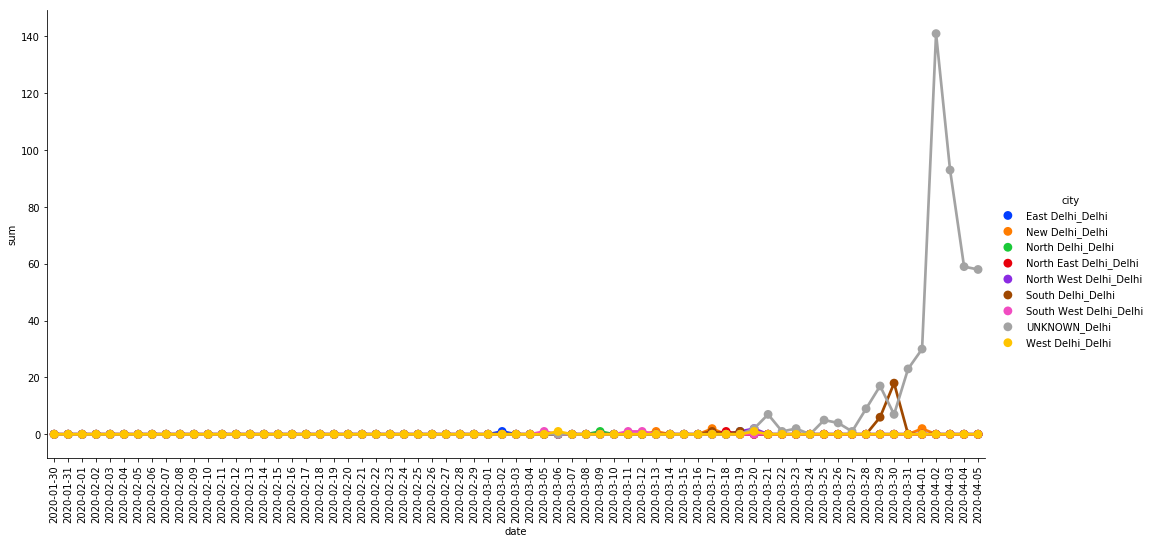

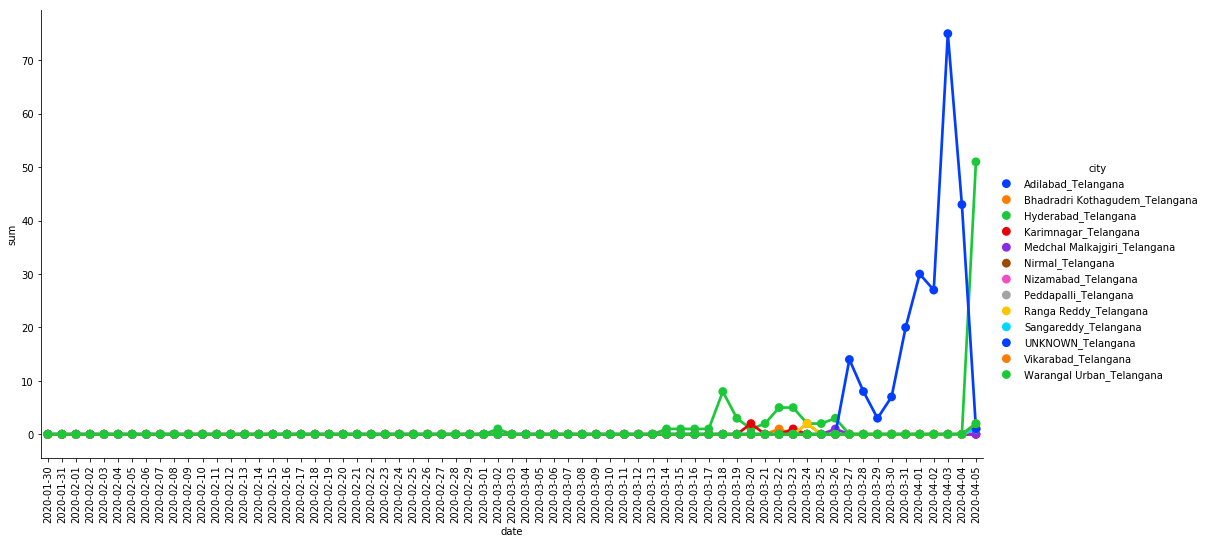

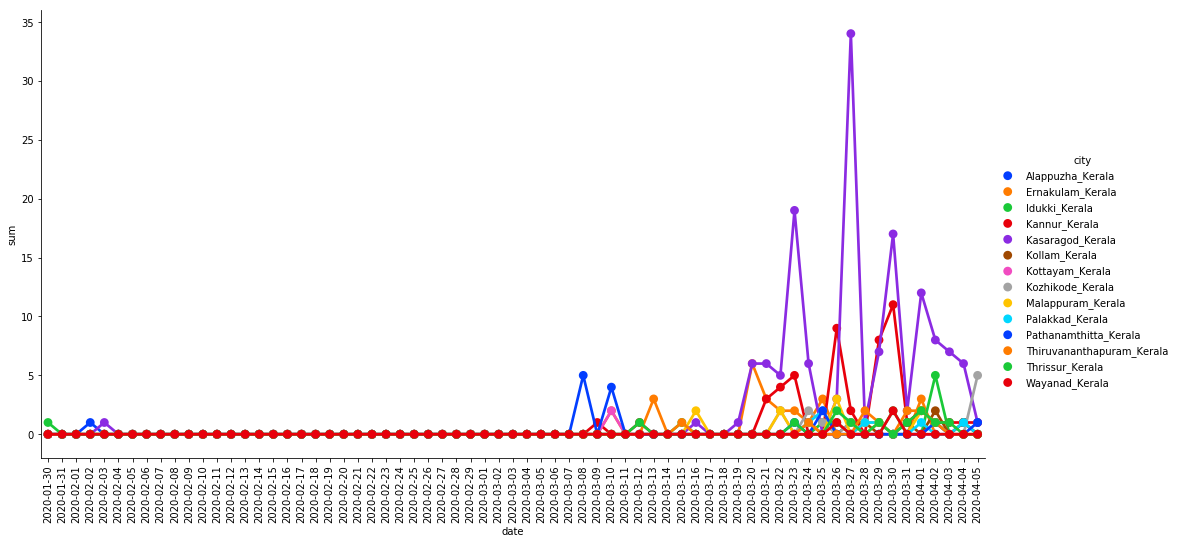

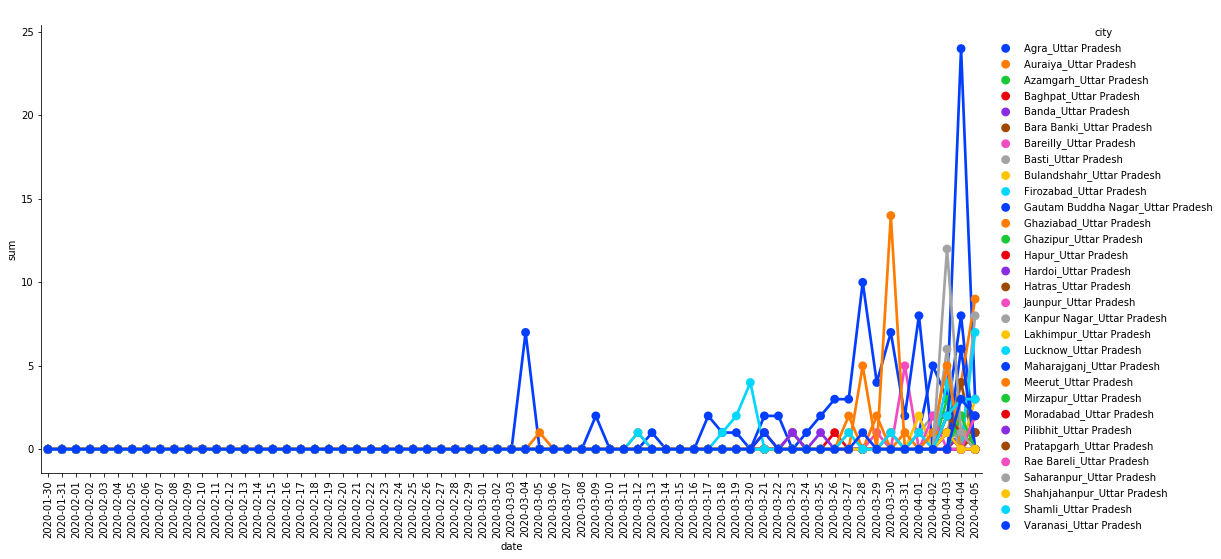

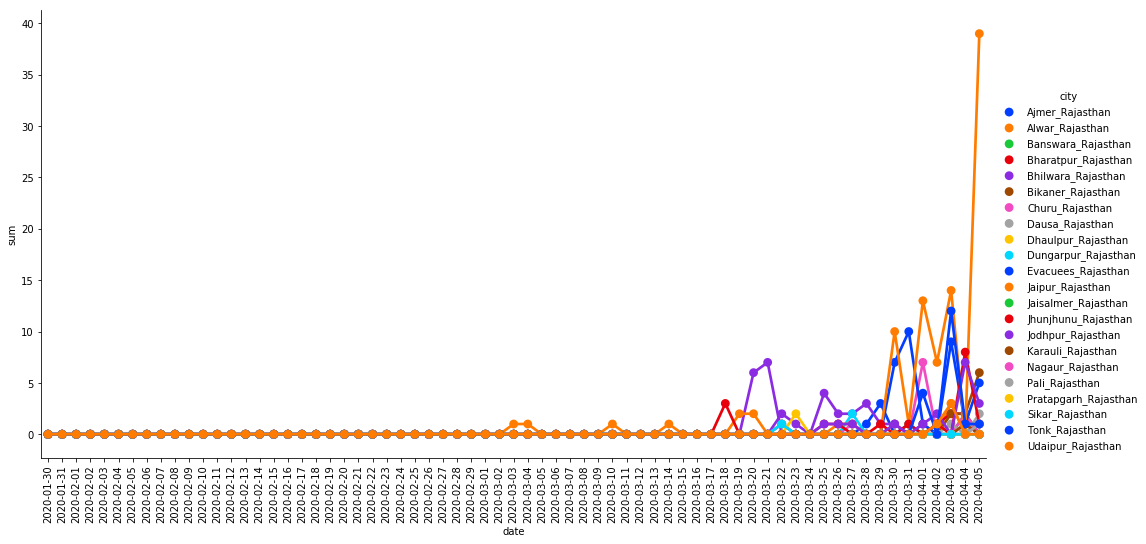

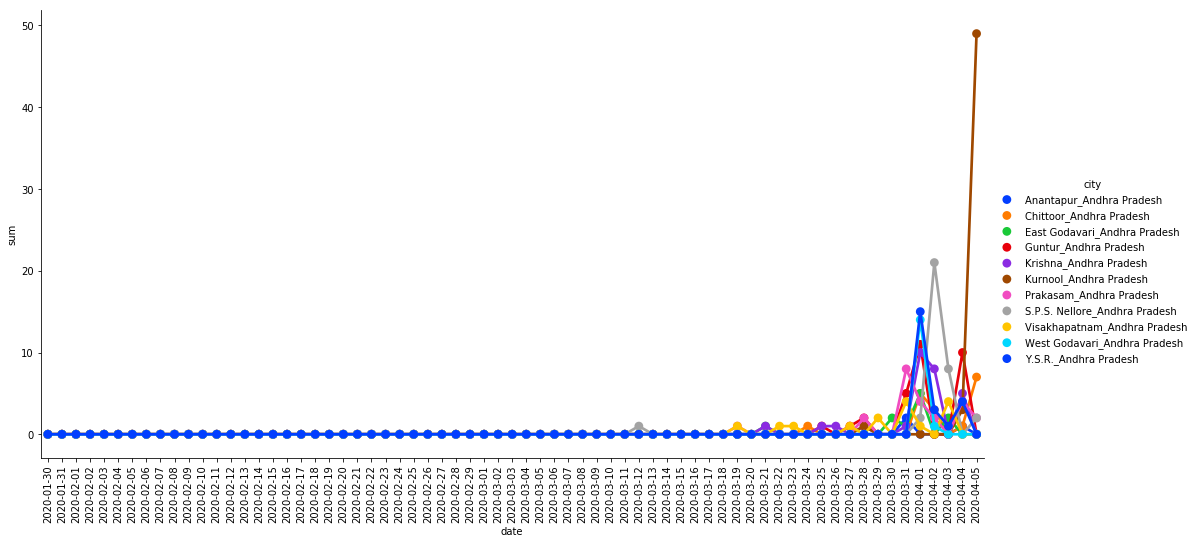

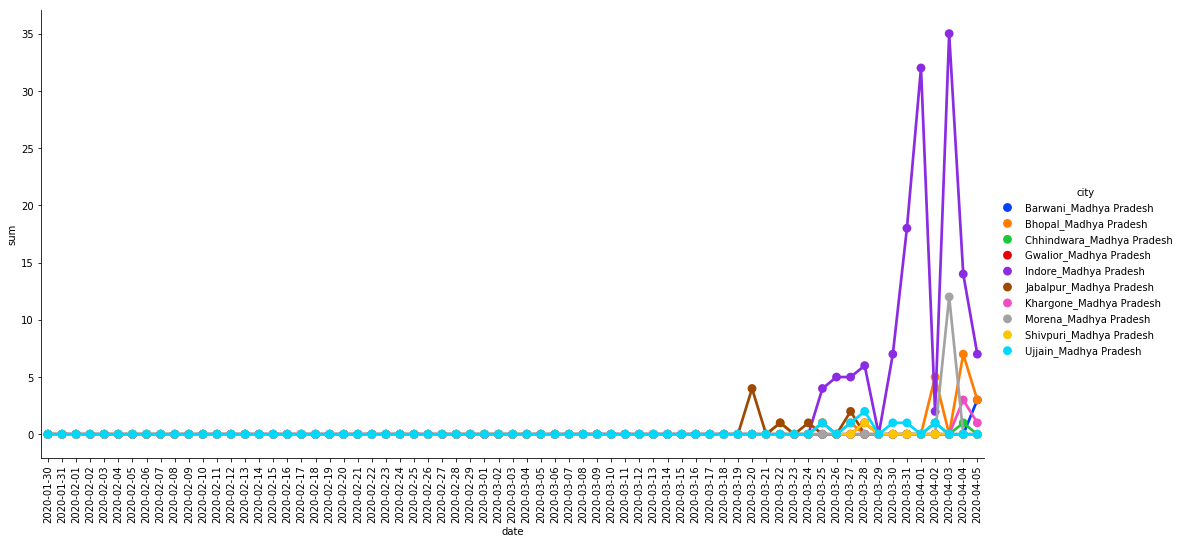

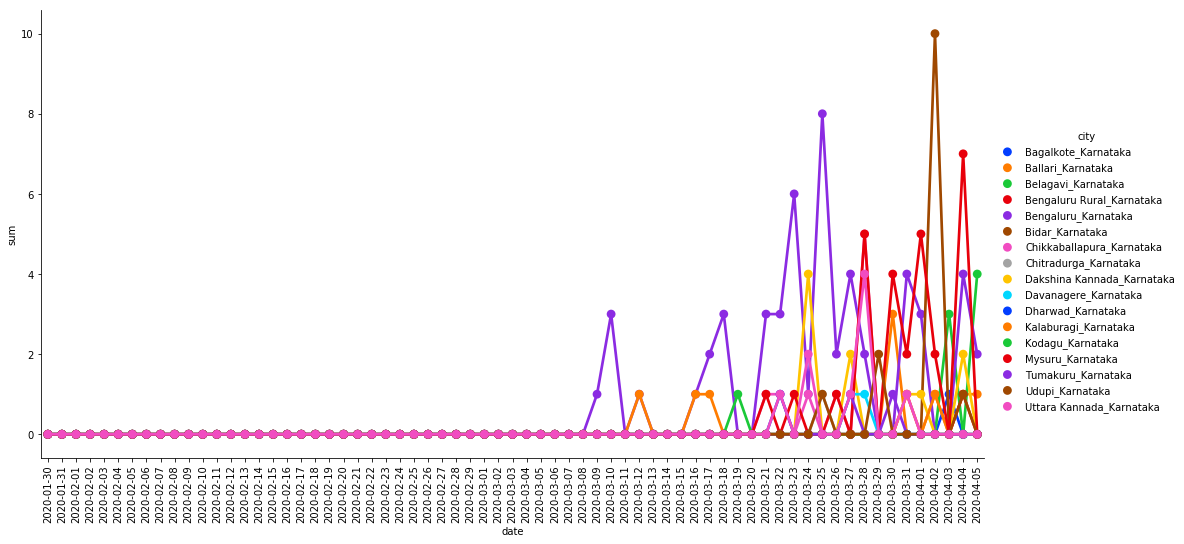

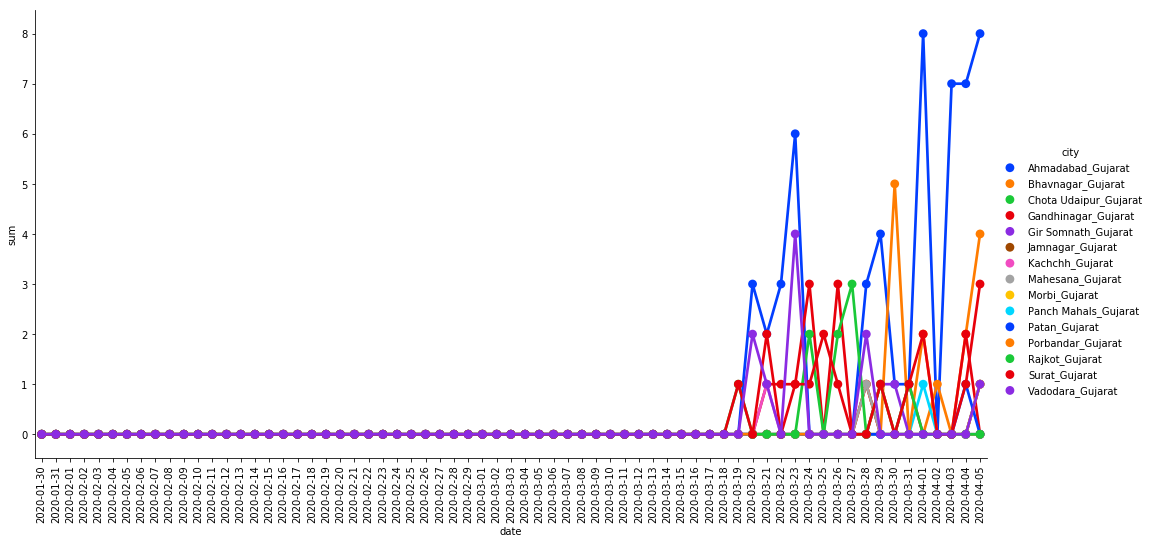

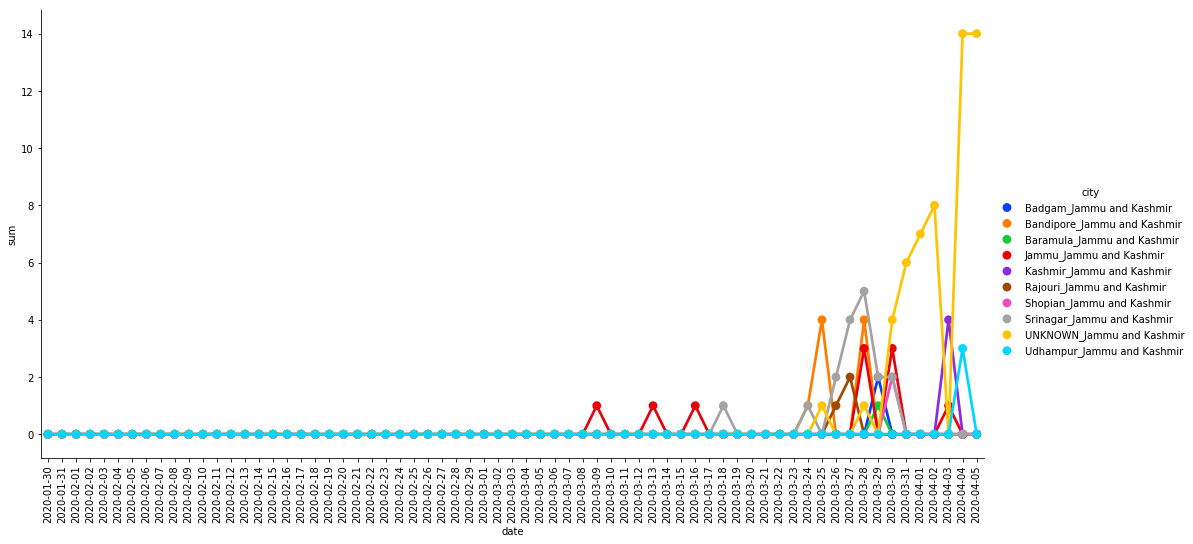

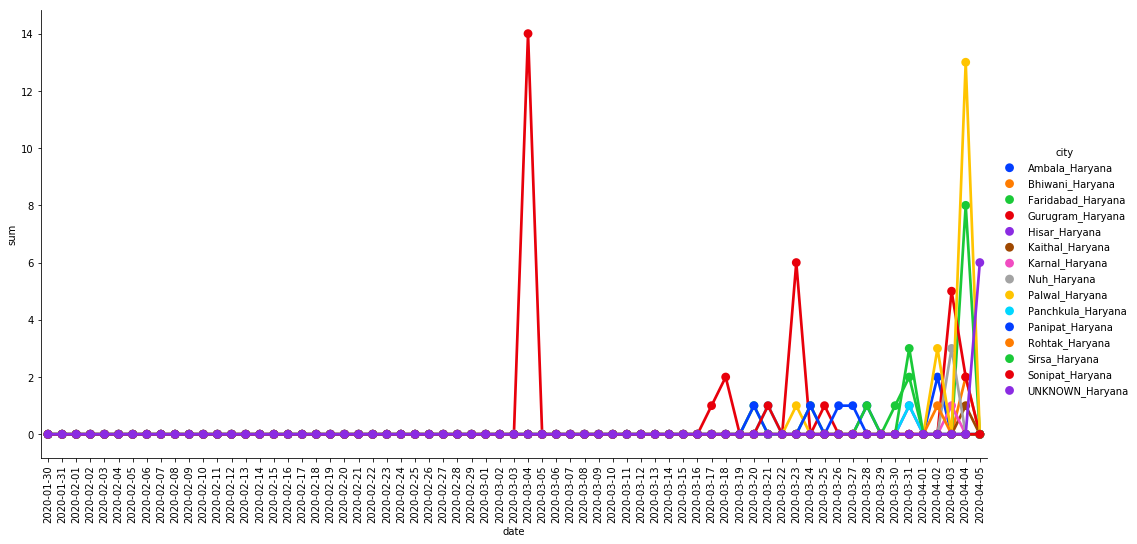

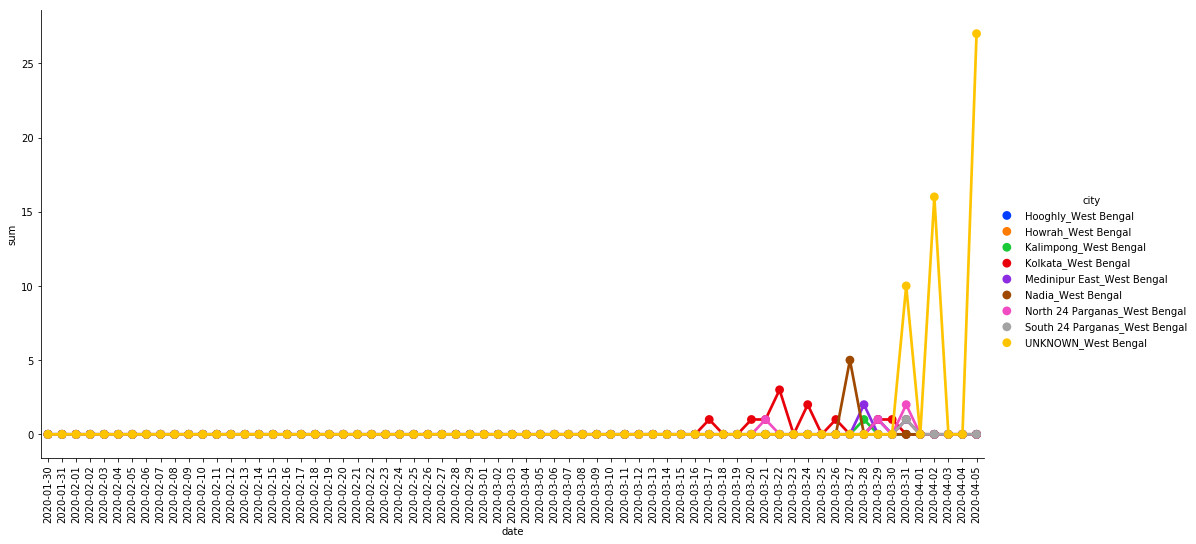

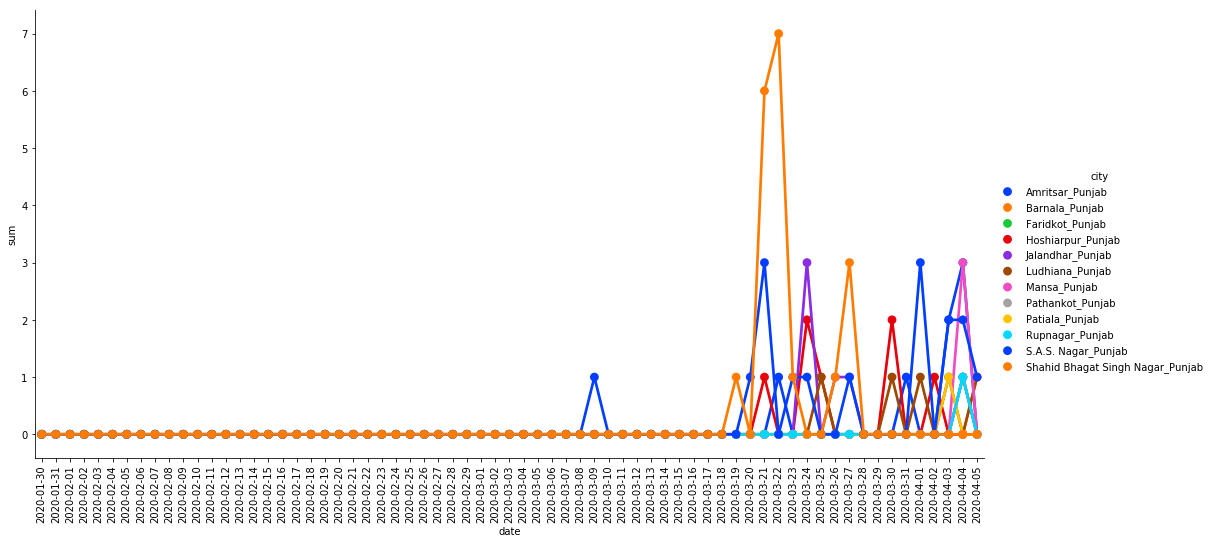

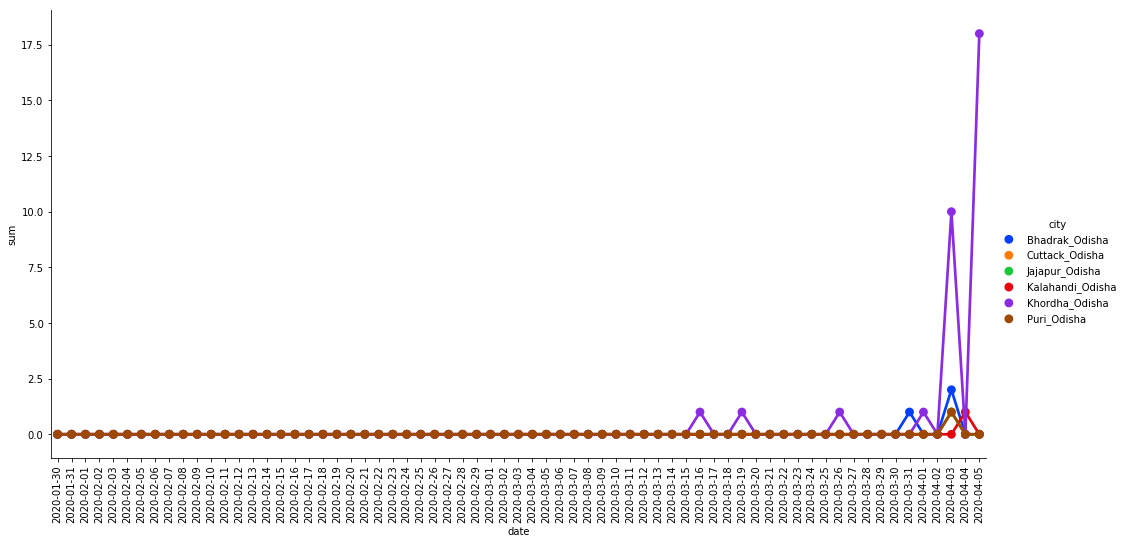

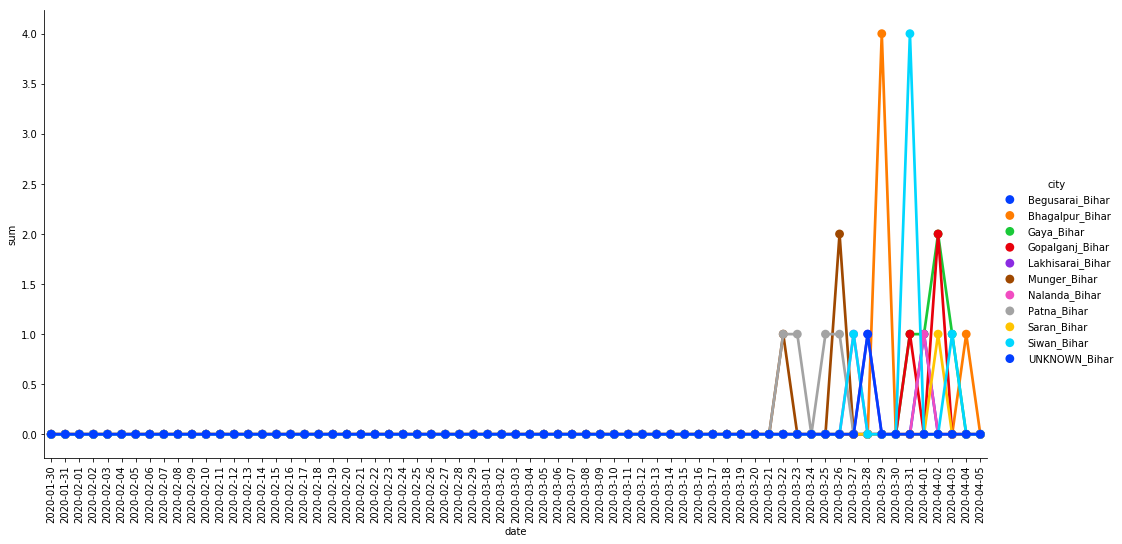

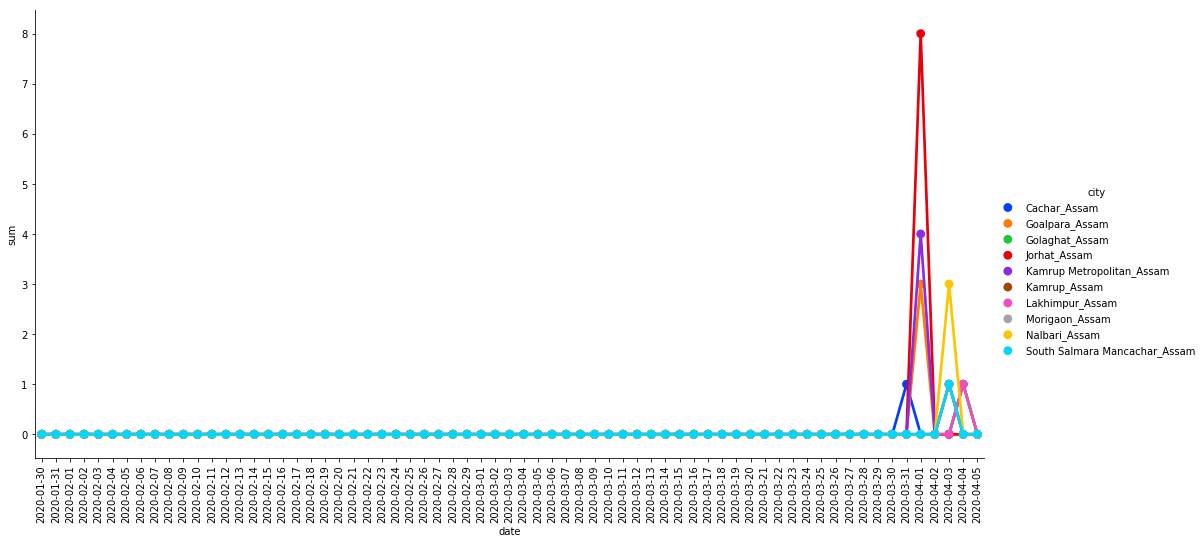

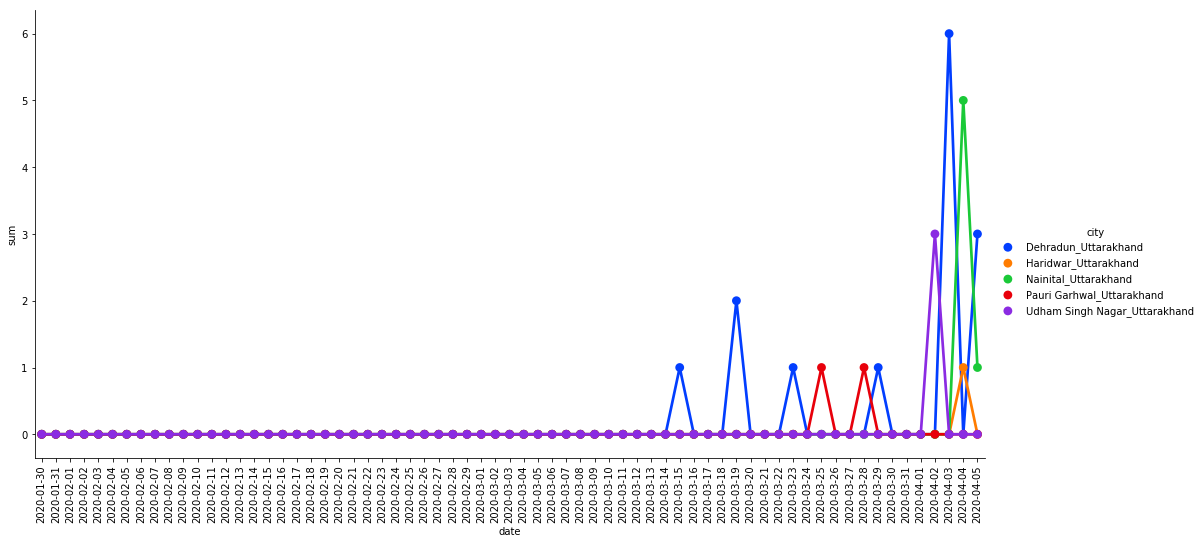

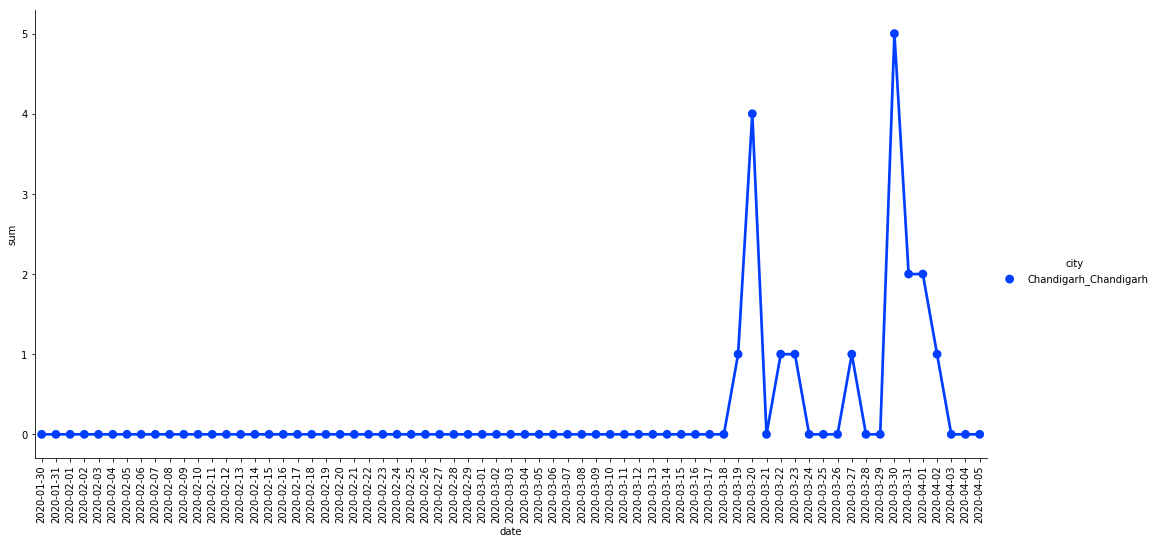

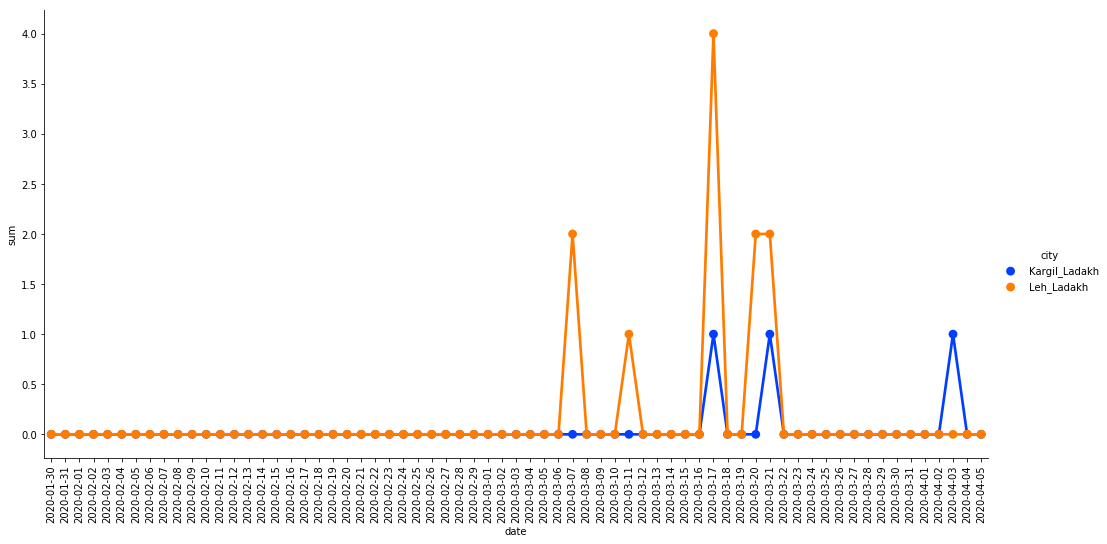

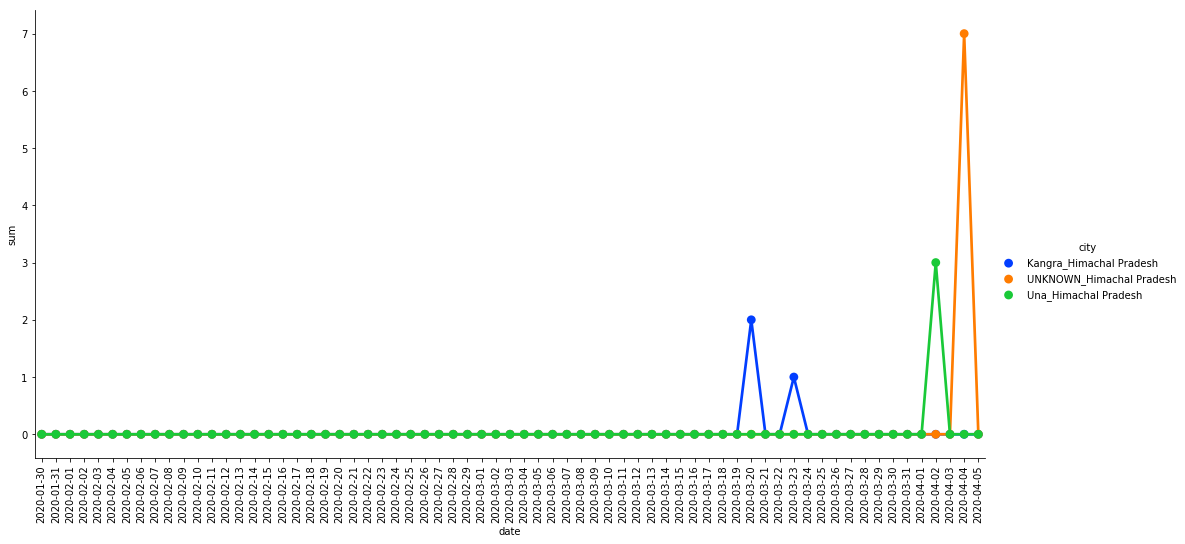

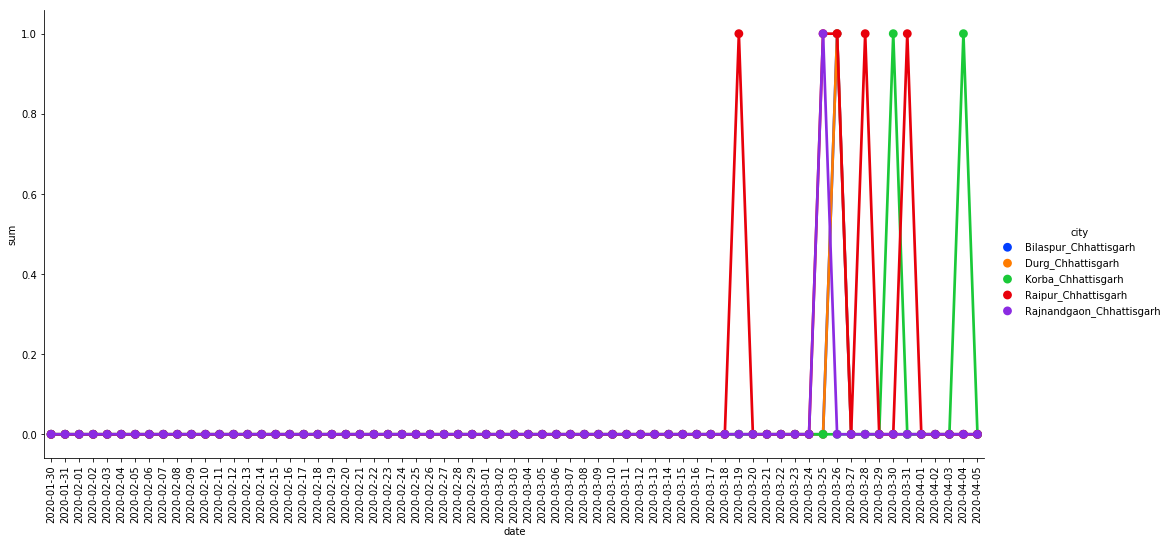

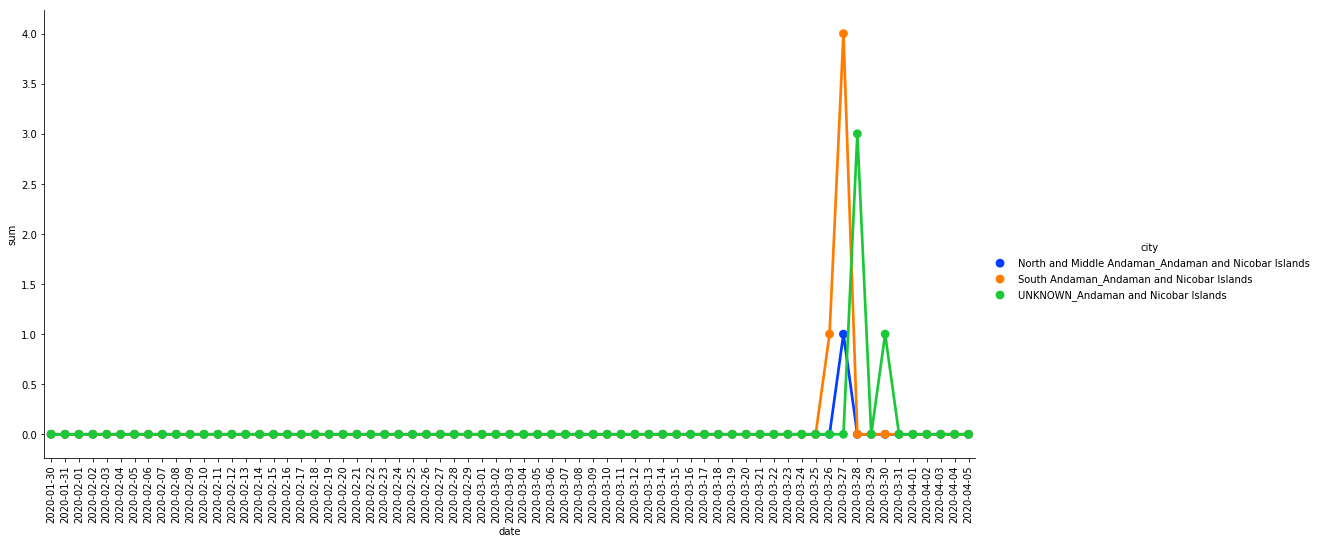

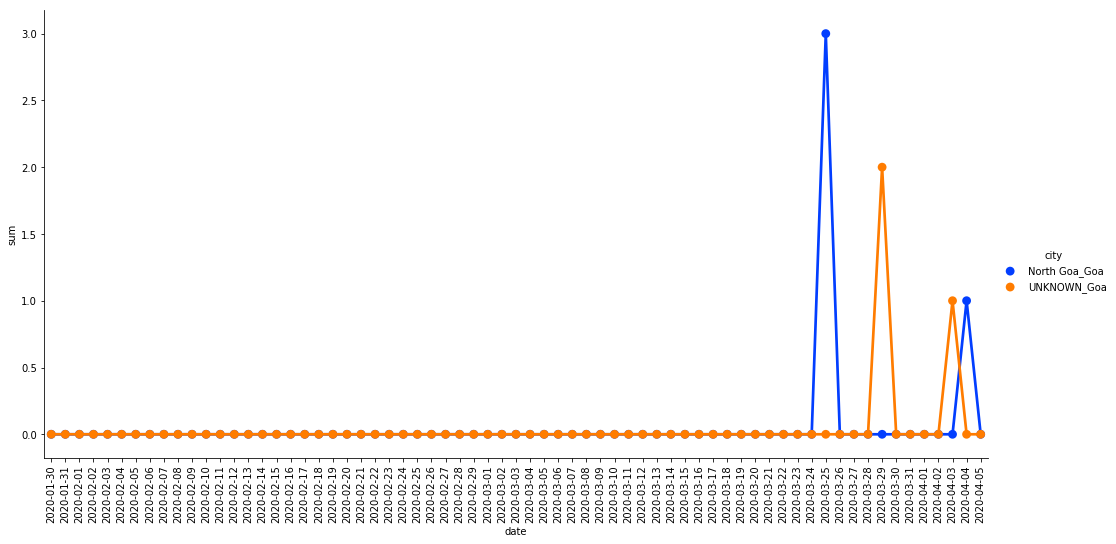

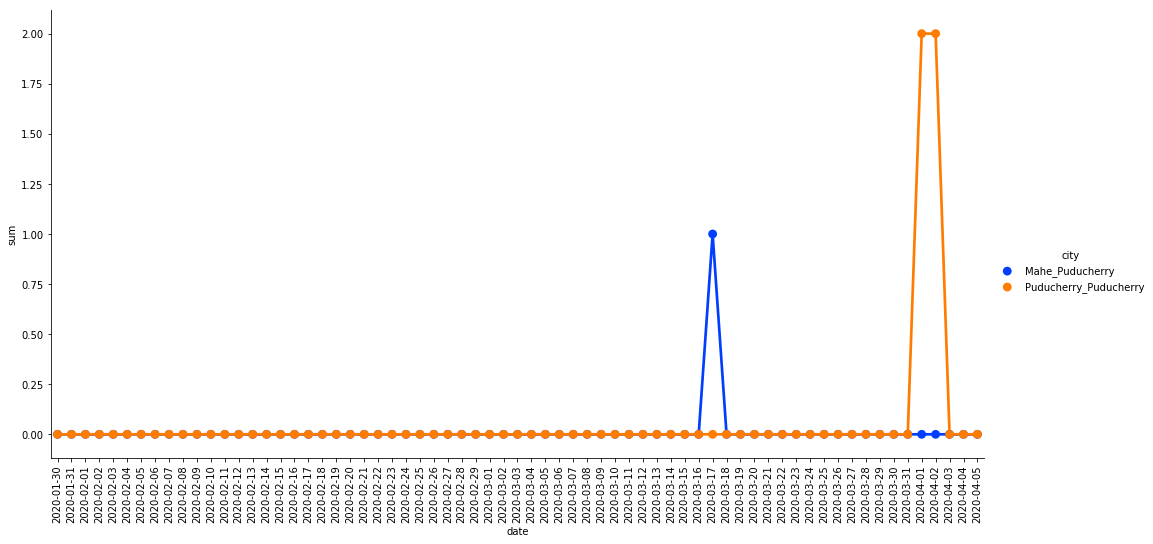

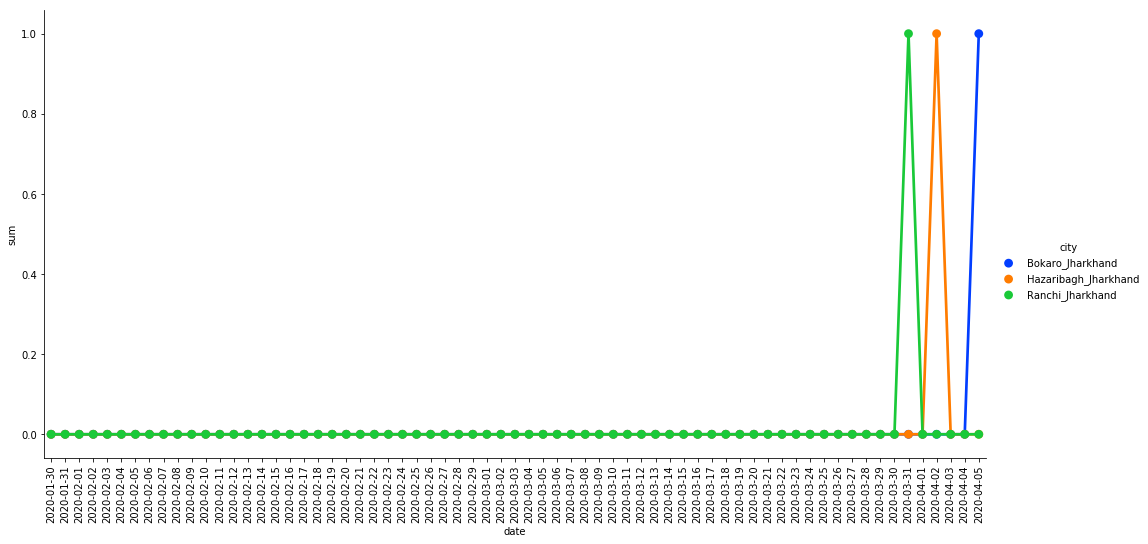

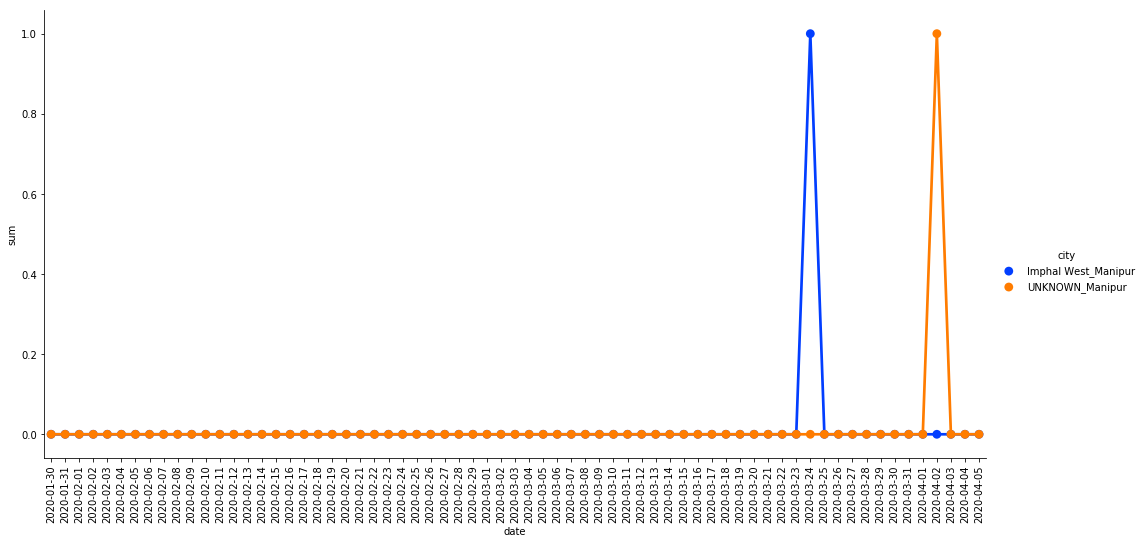

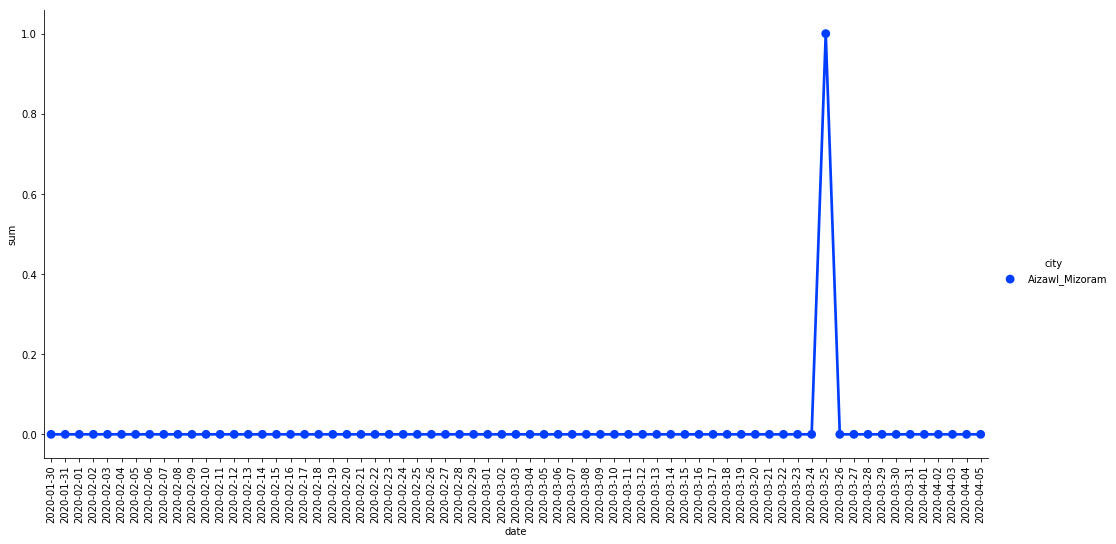

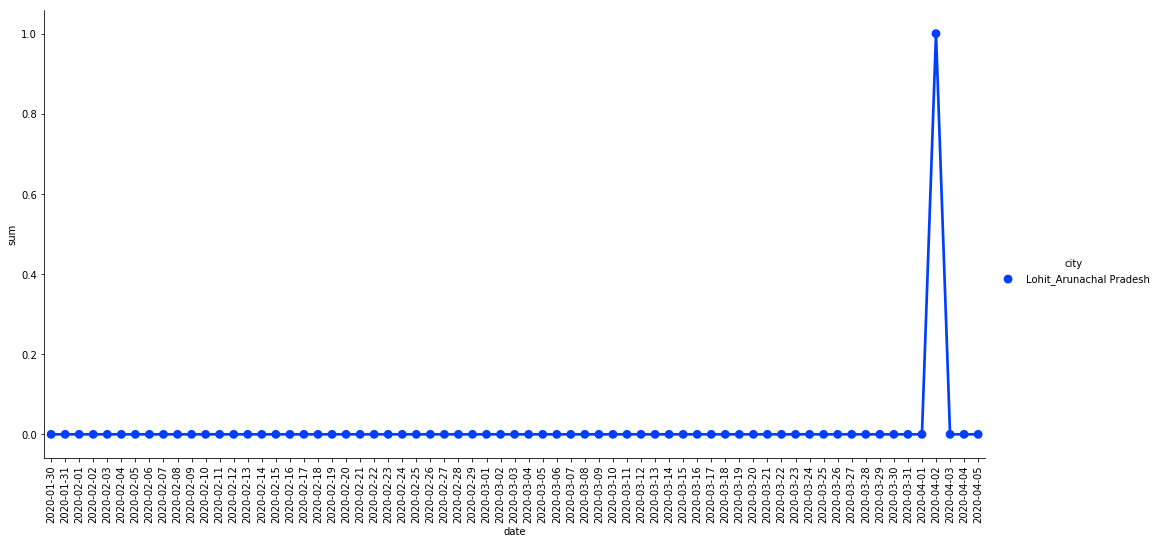

In [34]:
for s in unique_state:
    df2 = df1.loc[df1.state==s]
    #print (s)
    weekly_trend(feature=['city'])

In [35]:
df

1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,day
3,1,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 198...",NaN,30
4,2,KL-AL-P1,2020-02-02,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,"<div class=""softmerge-inner"" style=""width: 198...",33
5,3,KL-KS-P1,2020-02-03,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 198...",34
6,4,DL-P1,2020-03-02,45,M,"<div class=""softmerge-inner"" style=""width: 108...",East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,"<div class=""softmerge-inner"" style=""width: 298...",62
7,5,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,"<div class=""softmerge-inner"" style=""width: 255...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 93p...","<div class=""softmerge-inner"" style=""width: 298...",62
8,6,NaN,2020-03-03,69,M,Jaipur,Jaipur,Rajasthan,RJ,Recovered,Travelled from Italy,NaN,Italy,Imported,03/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",Italian tourist,63
9,7,NaN,2020-03-04,55,NaN,Gurugram,Gurugram,Haryana,HR,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,Italian tourist,64
10,8,NaN,2020-03-04,55,NaN,Gurugram,Gurugram,Haryana,HR,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,Italian tourist,64
11,9,NaN,2020-03-04,55,NaN,Gurugram,Gurugram,Haryana,HR,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,Italian tourist,64
12,10,NaN,2020-03-04,55,NaN,Gurugram,Gurugram,Haryana,HR,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,Italian tourist,64


In [36]:
df['Status Change Date'] = pd.to_datetime(df['Status Change Date'],format='%d/%m/%Y')
df['diff'] = df['Status Change Date'] - df['Date Announced']
df['diff'] = df['diff'].apply(lambda x: str(x).split(" ")[0])
df.loc[df['Current Status']=='Recovered','diff'].value_counts(dropna=False)

0      18
25     12
11     11
8       8
6       6
21      6
10      5
16      4
9       4
7       4
18      4
15      3
17      3
13      3
14      2
12      2
-12     1
19      1
20      1
5       1
24      1
Name: diff, dtype: int64

In [37]:
df.loc[(df['Current Status']=='Recovered') & (df['diff']=='0')]

1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,day,diff
7,5,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,...,NaN,India,Imported,2020-03-02,"<div class=""softmerge-inner"" style=""width: 255...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 93p...","<div class=""softmerge-inner"" style=""width: 298...",62,0
8,6,NaN,2020-03-03,69,M,Jaipur,Jaipur,Rajasthan,RJ,Recovered,...,NaN,Italy,Imported,2020-03-03,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",Italian tourist,63,0
23,21,NaN,2020-03-04,70,F,Jaipur,Jaipur,Rajasthan,RJ,Recovered,...,P6,Italy,Imported,2020-03-04,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 198...",64,0
32,30,NaN,2020-03-05,59,M,Ghaziabad,Ghaziabad,Uttar Pradesh,UP,Recovered,...,NaN,India,Imported,2020-03-05,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 198...",65,0
36,34,TN-P1,2020-03-07,45,M,Kancheepuram,Kancheepuram,Tamil Nadu,TN,Recovered,...,NaN,India,Imported,2020-03-07,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...","<div class=""softmerge-inner"" style=""width: 198...",67,0
65,63,NaN,2020-03-10,85,M,Jaipur,Jaipur,Rajasthan,RJ,Recovered,...,NaN,India,Imported,2020-03-10,"<a href=""https://www.google.com/url?q=http://h...","<a href=""https://www.google.com/url?q=https://...",NaN,"<div class=""softmerge-inner"" style=""width: 198...",70,0
117,115,KA-P8,2020-03-16,32,M,Bengaluru,Bengaluru,Karnataka,KA,Recovered,...,NaN,India,Imported,2020-03-16,"<a href=""https://www.google.com/url?q=https://...",NaN,NaN,"<div class=""softmerge-inner"" style=""width: 498...",76,0
118,116,KA-P7,2020-03-16,45,F,Kalaburagi,Kalaburagi,Karnataka,KA,Recovered,...,P74,India,Local,2020-03-16,"<a href=""https://www.google.com/url?q=https://...",NaN,NaN,"<div class=""softmerge-inner"" style=""width: 198...",76,0
137,135,KA-P10,2020-03-17,20,F,Bengaluru,Bengaluru,Karnataka,KA,Recovered,...,NaN,India,Imported,2020-03-17,"<a href=""https://www.google.com/url?q=https://...",NaN,NaN,"<div class=""softmerge-inner"" style=""width: 198...",77,0
139,137,KA-P9,2020-03-17,63,M,Kalaburagi,Kalaburagi,Karnataka,KA,Recovered,...,P74,India,Local,2020-03-17,"<a href=""https://www.google.com/url?q=https://...","<a href=""https://www.google.com/url?q=https://...",NaN,Doctor of P74,77,0
